**Анализ видеоигр**

На основе имеющихся данных  необходимо провести анализ популярности видеоигр. Для этого необходиом рассмотреть 
определнный отрезок времени, проанализировать влияние различных платформ, жанров, составить портреты пользователей для каждого 
региона, провести проверки гипотез

**План проекта**

1) Изучим данные и их целостность в датасете, исследуем пропуски и 
типы данных в представленных столбцах.

2) Проведем исследовательский анализ данных, 
построим столбчатые диаграммы и распределения. Исследуем выпуск игр по годам и по платформам

3) Составим портрет пользователя каждого региона

4) Проверим статистические гипотезы

5) На основании проделанной работы сформулируем выводы и рекомендации

**Описание данных**

Name — название игры

Platform — платформа

Year_of_Release — год выпуска

Genre — жанр игры

NA_sales — продажи в Северной Америке (миллионы проданных копий)

EU_sales — продажи в Европе (миллионы проданных копий)

JP_sales — продажи в Японии (миллионы проданных копий)

Other_sales — продажи в других странах (миллионы проданных копий)

Critic_Score — оценка критиков (максимум 100)

User_Score — оценка пользователей (максимум 10)

Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import seaborn as sns

In [2]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [3]:
import missingno as msno

In [4]:
try:
    data=pd.read_csv(r'C:\Users\Acer\Documents\data_analyst\games.csv')
except:
    data=pd.read_csv('/datasets/games.csv')

In [5]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


**Подготовьте данные**

Замените названия столбцов (приведите к нижнему регистру)

In [6]:
data.columns = [i.lower() for i in data.columns.tolist()]

In [7]:
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Выведем основную информацию о датасете

In [8]:
def data_info(data):
    print('Первые 5 строк в датафрейме:')
    display(data.head())
    print('------------------------------------------------------------------------------------')
    print('Основная информация df.info():')
    data.info()
    print('------------------------------------------------------------------------------------')
    display(pd.DataFrame({'Количество пропущенных значений': data.isna().sum()}))
    print('------------------------------------------------------------------------------------')
    print(f'Количество дубликатов: {data.duplicated().sum()}')
    print('------------------------------------------------------------------------------------')

In [9]:
data_info(data)

Первые 5 строк в датафрейме:


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


------------------------------------------------------------------------------------
Основная информация df.info():
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
------------------------------------------------------------------------------------


,Количество пропущенных значений
name,2
platform,0
year_of_release,269
genre,2
na_sales,0
eu_sales,0
jp_sales,0
other_sales,0
critic_score,8578
user_score,6701


------------------------------------------------------------------------------------
Количество дубликатов: 0
------------------------------------------------------------------------------------



</font><font color='Blue'><b>Произведем проверку и удалим неявные дубликаты </b></font><br>

In [10]:
data[data.duplicated(['name', 'platform','year_of_release'])]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
14244,NaN,GEN,1993.0,NaN,0.0,0.00,0.03,0.0,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012.0,Sports,0.0,0.01,0.00,0.0,83.0,5.5,E


In [11]:
data=data.drop_duplicates(subset=['name', 'platform','year_of_release'])

Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему

Изменим значения у year_of_release и user_score. Так как user_score выражается в виде числа с плавающей точкой от 0 до 10, 
то приведем его к типу float, а год выпуска к datetime

tbd - to be discussed, поэтому для анализа заменим на NaN

In [12]:

data['user_score']=data['user_score'].replace('tbd','NaN')

In [13]:
data['user_score']=data['user_score'].astype(float)

In [14]:

data['year_of_release'] = pd.to_datetime(data['year_of_release'], format='%Y').dt.year


пропуски в основном в столбцах: critic_score, user_score, rating

In [15]:
#то есть не получится хорошо заполнить с помощью линейной зависимости
data['critic_score'].corr(data['user_score'])

0.5811220781939394

In [16]:

data=data.dropna(subset=['year_of_release'])

In [17]:
#очистим самые незаполненные строки
data=data.dropna(subset=['name','genre'],how='all')

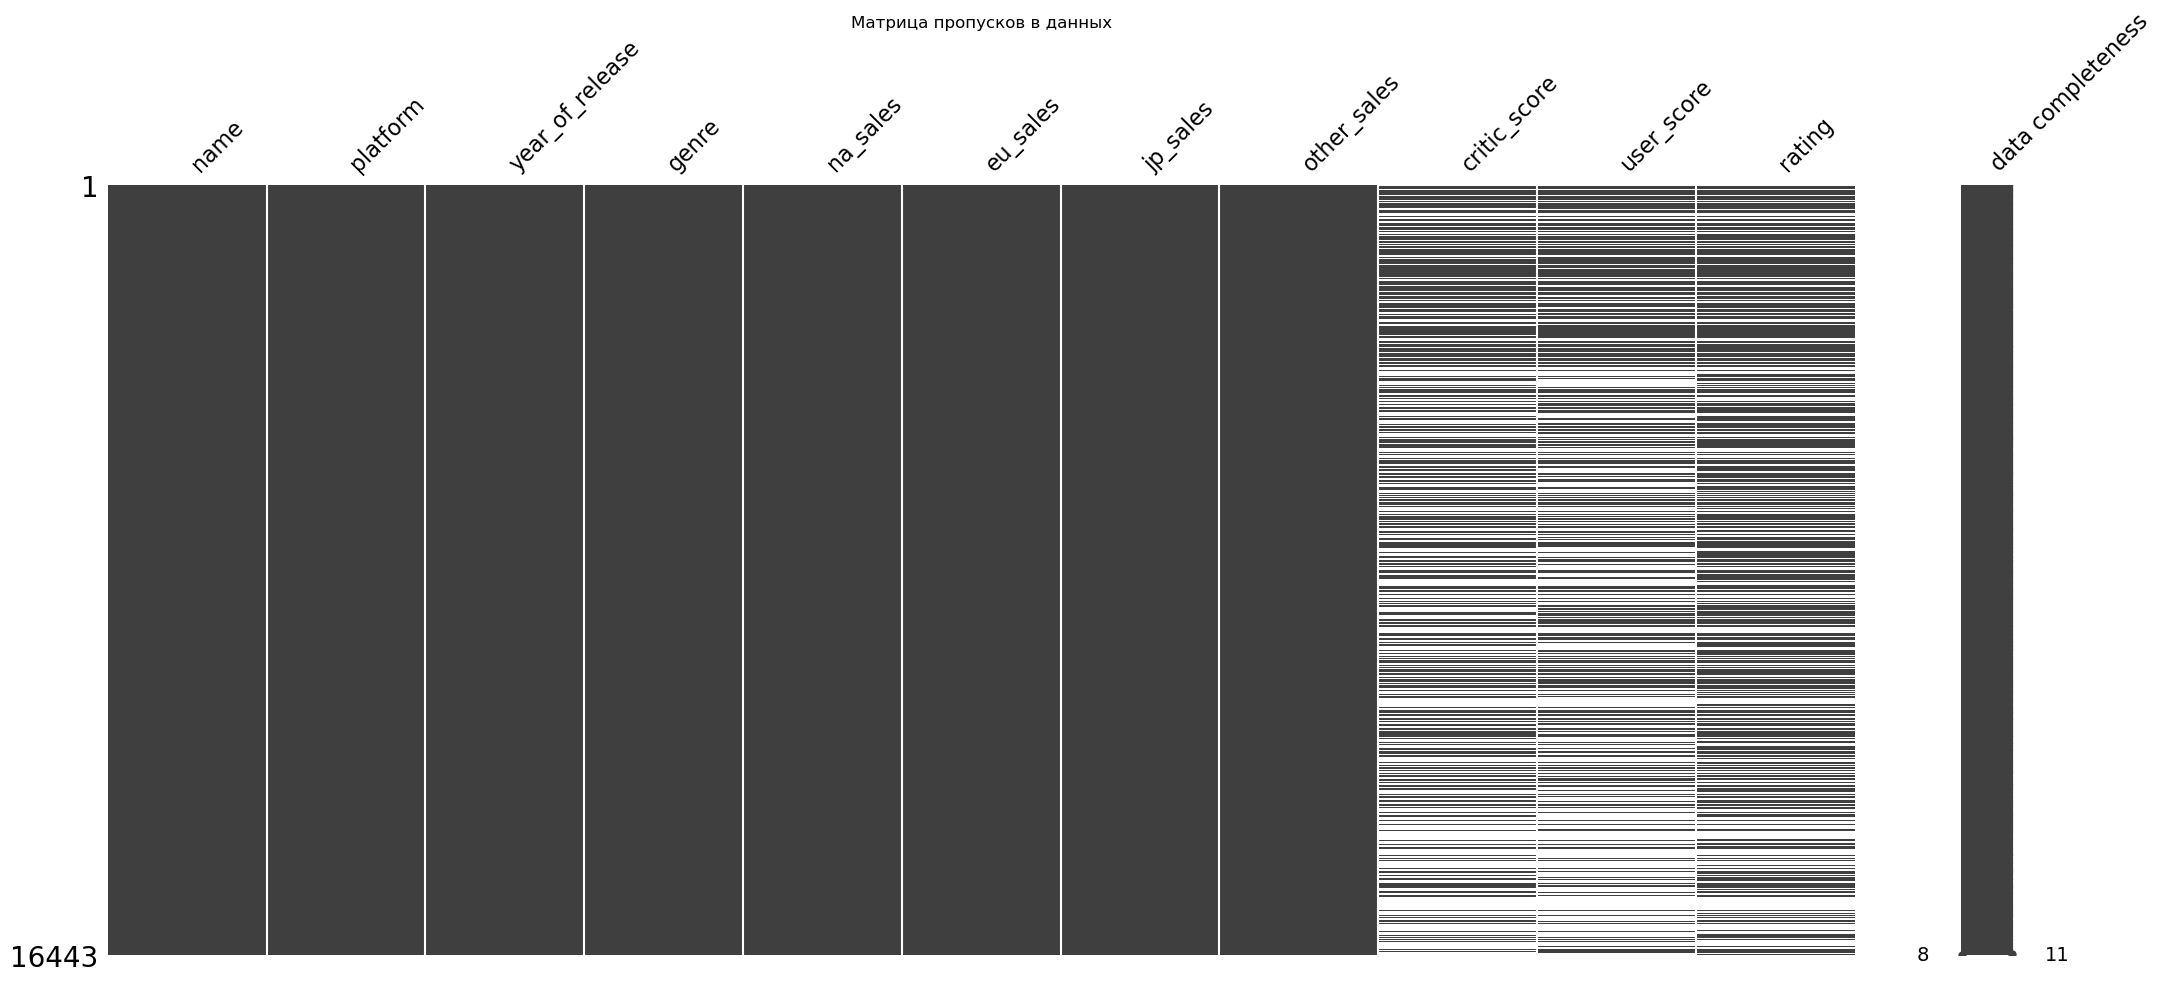

In [18]:
msno.matrix(data,labels=True);
plt.title('Матрица пропусков в данных');


Построи матрицу корелляции пропусков

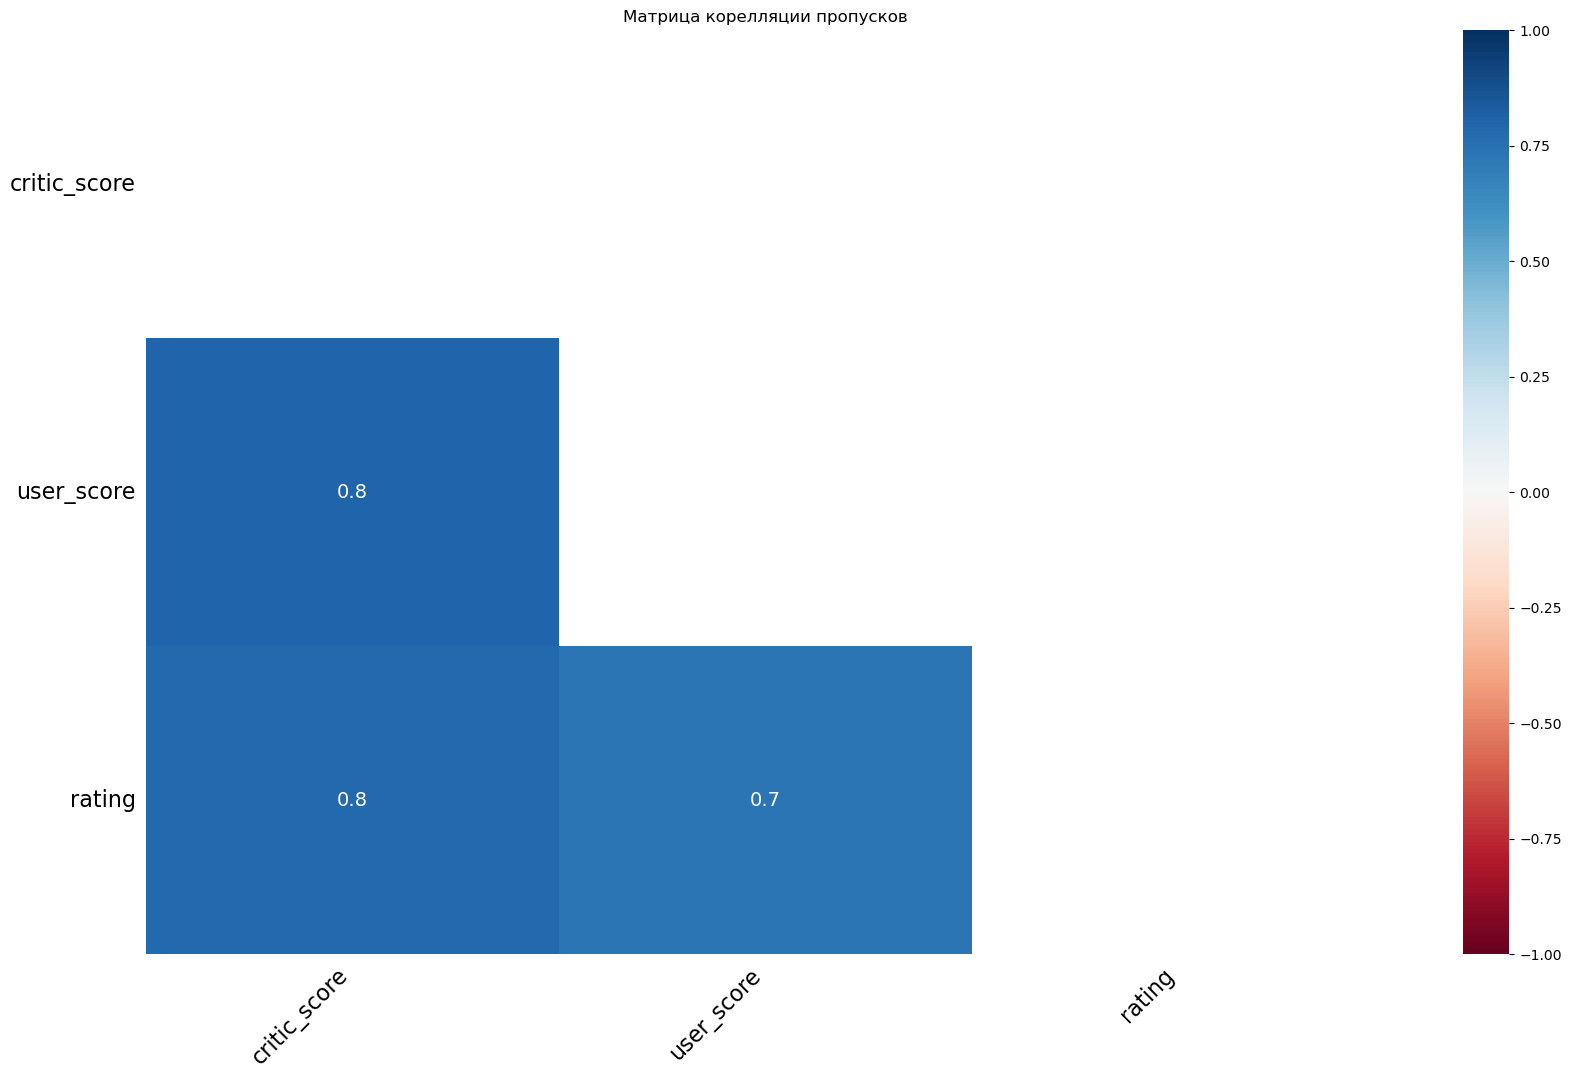

In [19]:
msno.heatmap(data);
plt.title('Матрица корелляции пропусков');



Отметим, что пропуски в critic_score, user_score и rating имеют положительную корелляцию друг с другом и практически равную по 
значению, тогда как rating и critic_score имеют незначительную корелляцию с годом, поскольку остальные коэффициенты 
корелляции равны 0, то можно предположить, что более старые игры не имели информации об оценке и рейтинге. И также 
critic_score и user_score часто оценивается вместе, при этом не для каждой игры, особенно для не особо известных, 
есть информация о мнениях критиков

In [20]:
#data=data.dropna(subset=['genre','name'],how='all')

Таким образом, большинство пропущенных значений сразу у трех столбцов critic_score, user_score, rating. А также 
линейная зависимость между critic_score и user_score выражена не сильно. Так как основные характеристики это объем продаж, год, 
жанр и регион, которые практически заполнены, то пропуски critic_score, user_score, rating не будем заполнять, тем более, 
как было сказано выше, у нас нет оснований заполнить их какими-то значениями, соблюдая при этом логику

Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

In [21]:
data['total_sales']=data['na_sales']+data['eu_sales']+data['jp_sales']+data['other_sales']

</font><font color='Blue'><b>В рамках предобработки данных была исследована целостность 
датасета, удалены строки с большим количеством пропусков в информативных столбцах. Также были удалены неявные дубликаты
 и значения столбцов приведены к соответствующим им типам данных</b></font><br>

In [22]:
# Комментарий ревьюера 00
# Посмотрим, что осталось
temp = data.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().mean()*100,2),'%') 

<class 'pandas.core.frame.DataFrame'>
Index: 16443 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  float64
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   float64
 10  rating           9767 non-null   object 
 11  total_sales      16443 non-null  float64
dtypes: float64(8), object(4)
memory usage: 1.6+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio' 'uDraw Studio: Instant Artist'
 '¡Shin Chan Flipa en colores!']
name : кол-во Na

</font><font color='Blue'><b>Так как рейтинг ESRB используется в США и Канаде, то для других стран он не задан
, поэтому заменим nan на not_assigned</b></font><br>

In [23]:
data['rating']=data['rating'].fillna('not_assigned')

**Шаг 3. Проведите исследовательский анализ данных**

Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

In [24]:
data['year_of_release'].value_counts().shape

(37,)

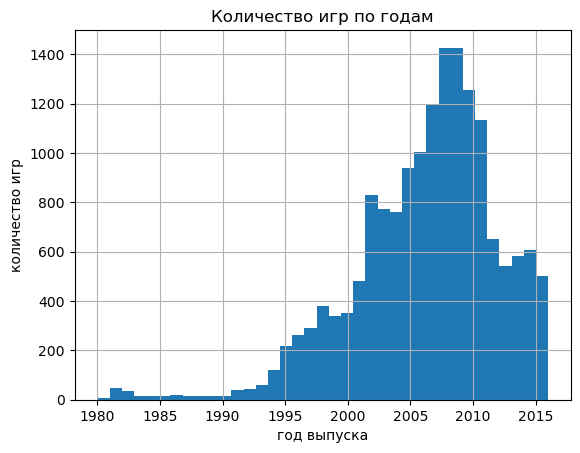

In [25]:
data['year_of_release'].hist(bins=37);
plt.title('Количество игр по годам');
plt.xlabel('год выпуска');
plt.ylabel('количество игр');


Больше всего данных представлено за 2005-2010 год. Для анализа не важны все периоды, так как игры, выпущенные довольно 
давно не имеют смысла для анализа актуальной ситуации на рынке компьютерных игр

Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

В результате дальнейшего анализа при построении графика продаж по консолям была обнаружена ошибка 
(игра 2010 года, а год был указан 1985). В данном случае изменю 
этот момент сразу

In [26]:
data.loc[15957,['year_of_release']] = 2010

Посмотрим на самые популярные консоли по количеству выпущенных игр

In [27]:
pl=data['platform'].value_counts().head(5).reset_index()
pl

,platform,count
0,PS2,2127
1,DS,2121
2,PS3,1305
3,Wii,1286
4,X360,1232


С учетом наибольших суммарных продаж

In [28]:

pl_sales=data.pivot_table(index='platform',values='total_sales',aggfunc=['sum']).reset_index()
pl_sales.columns=['platform','total_sales']
pl_sales=pl_sales.sort_values(by='total_sales',ascending=False).head(10)
pl_sales

,platform,total_sales
16,PS2,1233.56
28,X360,961.24
17,PS3,931.33
26,Wii,891.18
4,DS,802.78
15,PS,727.58
18,PS4,314.14
6,GBA,312.88
19,PSP,289.53
2,3DS,257.81


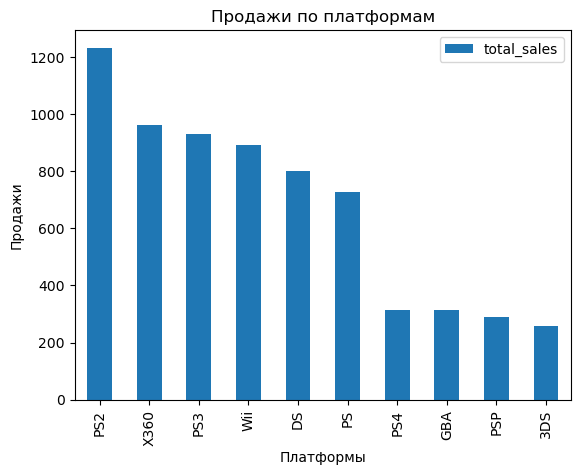

In [29]:
pl_sales.plot.bar(x="platform");
plt.title('Продажи по платформам');
plt.xlabel('Платформы');
plt.ylabel('Продажи');

In [30]:
#plist=list(pl['index'])
plist=list(pl['platform'])

In [31]:
#list(pl['platform'])

In [32]:
data.pivot_table(index='platform',columns='year_of_release',values='total_sales',aggfunc=['sum']).reset_index()

platform    sum                                            \
year_of_release          1980.0 1981.0 1982.0 1983.0 1984.0 1985.0 1986.0   
0                   2600  11.38  35.68  28.88   5.84   0.27   0.45   0.67   
1                    3DO    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2                    3DS    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
3                     DC    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
4                     DS    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
5                     GB    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
6                    GBA    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
7                     GC    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
8                    GEN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
9                     GG    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
10                   N64    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
11                   NES    NaN    NaN    NaN  10.96  50.08  53.44  36.41   
12                    NG    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
13                    PC    NaN    NaN    NaN    NaN    NaN   0.04    NaN   
14                  PCFX    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
15                    PS    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
16                   PS2    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
17                   PS3    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
18                   PS4    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
19                   PSP    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
20                   PSV    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
21                   SAT    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
22                   SCD    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
23                  SNES    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
24                  TG16    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
25                    WS    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
26                   Wii    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
27                  WiiU    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
28                  X360    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
29                    XB    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
30                  XOne    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

                               ...                                          \
year_of_release 1987.0 1988.0  ...  2007.0  2008.0  2009.0  2010.0  2011.0   
0                 1.94   0.74  ...     NaN     NaN     NaN     NaN     NaN   
1                  NaN    NaN  ...     NaN     NaN     NaN     NaN     NaN   
2                  NaN    NaN  ...     NaN     NaN     NaN     NaN   63.20   
3                  NaN    NaN  ...    0.02    0.04     NaN     NaN     NaN   
4                  NaN    NaN  ...  146.94  145.31  119.54   85.04   26.18   
5                  NaN   1.43  ...     NaN     NaN     NaN     NaN     NaN   
6                  NaN    NaN  ...    3.40     NaN     NaN     NaN     NaN   
7                  NaN    NaN  ...    0.27     NaN     NaN     NaN     NaN   
8                  NaN    NaN  ...     NaN     NaN     NaN     NaN     NaN   
9                  NaN    NaN  ...     NaN     NaN     NaN     NaN     NaN   
10                 NaN    NaN  ...     NaN     NaN     NaN     NaN     NaN   
11               19.76  45.01  ...     NaN     NaN     NaN     NaN     NaN   
12                 NaN    NaN  ...     NaN     NaN     NaN     NaN     NaN   
13                 NaN   0.03  ...    9.28   12.42   16.91   24.28   35.03   
14                 NaN    NaN  ...     NaN     NaN     NaN     NaN     NaN   
15                 NaN    NaN  ...     NaN     NaN     NaN     NaN     NaN   
16                 NaN    NaN  ...   75.99   53.90   26.40    5.64    

Создадим сводную таблицу для самых популярных консолей по суммарным продажам

In [33]:
# Комментарий ревьюера 00
temp = data.copy() 
list(temp.groupby('platform')['total_sales'].sum().sort_values(ascending=False).index[:5])

['PS2', 'X360', 'PS3', 'Wii', 'DS']

In [34]:
platf=data.query("platform in @plist").pivot_table(index='platform',columns='year_of_release',values='total_sales',aggfunc=['sum']).reset_index()
platf

platform    sum                                          \
year_of_release          2000.0  2001.0  2002.0  2003.0  2004.0  2005.0   
0                     DS    NaN     NaN     NaN     NaN   17.27  130.14   
1                    PS2  39.17  166.43  205.38  184.31  211.81  160.66   
2                    PS3    NaN     NaN     NaN     NaN     NaN     NaN   
3                    Wii    NaN     NaN     NaN     NaN     NaN     NaN   
4                   X360    NaN     NaN     NaN     NaN     NaN    8.25   

                                                                         \
year_of_release  2006.0  2007.0  2008.0  2009.0  2010.0  2011.0  2012.0   
0                119.81  146.94  145.31  119.54   85.04   26.18   11.01   
1                103.42   75.99   53.90   26.40    5.64    0.45     NaN   
2                 20.96   73.19  118.52  130.93  142.17  156.78  107.35   
3                137.15  152.77  171.32  206.97  127.95   59.65   21.71   
4                 51.62   95.41  135.26  120.29  170.03  143.84   99.74   

                                              
year_of_release  2013.0 2014.0 2015.0 2016.0  
0                  1.54    NaN    NaN    NaN  
1                   NaN    NaN    NaN    NaN  
2                113.25  47.76  16.82   3.60  
3                  8.59   3.75   1.14   0.18  
4                 88.58  34.74  11.96   1.52

In [35]:
years=platf[platf['platform']=='PS2']['sum'].columns.to_list()
years

[2000.0,
 2001.0,
 2002.0,
 2003.0,
 2004.0,
 2005.0,
 2006.0,
 2007.0,
 2008.0,
 2009.0,
 2010.0,
 2011.0,
 2012.0,
 2013.0,
 2014.0,
 2015.0,
 2016.0]

In [36]:
data.loc[data['platform']=='DS']['year_of_release'].value_counts()

year_of_release
2008.0    492
2009.0    403
2007.0    376
2010.0    324
2006.0    201
2011.0    153
2005.0    118
2004.0     23
2012.0     23
2013.0      8
Name: count, dtype: int64

1985 год скорее всего является опечаткой, поэтому уберем его

In [37]:
data[(data['year_of_release']==1985) & (data['platform']=='DS')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales


P.S. убрано выше

Построим график продаж по годам для самых популярных платформ

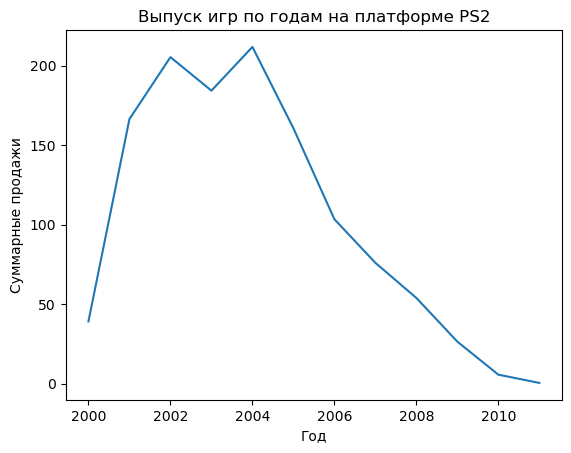

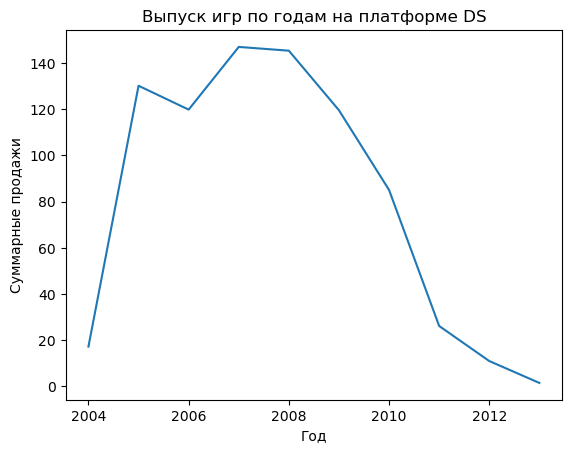

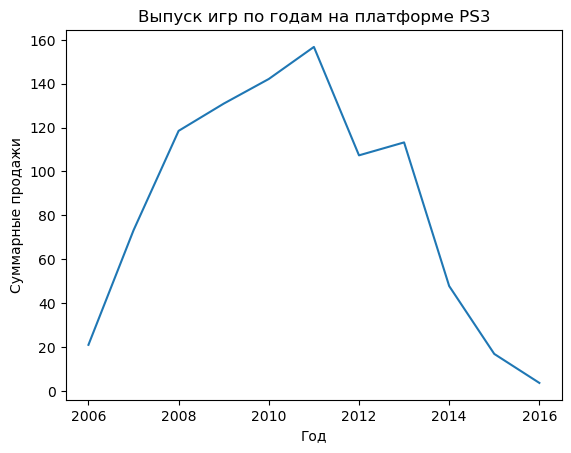

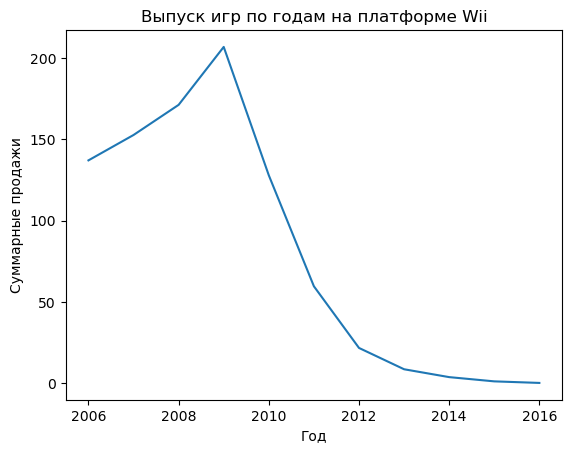

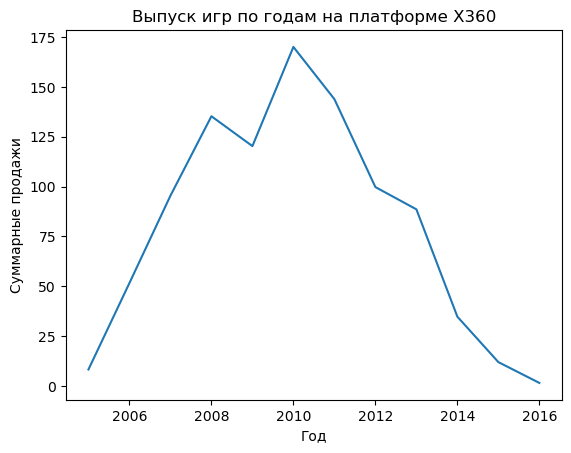

In [38]:
for i in plist:
    plt.plot(np.array(platf[platf['platform']==i]['sum'].columns.to_list()),platf[platf['platform']==i]['sum'].values.flatten())
    plt.xlabel('Год')
    plt.ylabel('Суммарные продажи')
    plt.title(f'Выпуск игр по годам на платформе {i}')
    plt.show()

Характерное срок популярности платформы около 10 лет. Пик популярности приходится примерно на 4-7 год

In [39]:
# Комментарий ревьюера
temp = data.copy() 
time_life = temp.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max']).reset_index()
time_life['life'] = time_life['max'] - time_life['min'] + 1 # в срок жизни платформы, должны входить границы диапазона, 
                                                            # поэтому +1
time_life['life'].median()

7.0

</font><font color='Blue'><b> 
Для анализа возьмем данные, начиная с 2012 года, чтобы понять, какие платформы к этому времени вышли на пик популярности, 
а какие уже популярность теряют. Также заметим платформы, которые обретают популярность на данный момент</b></font><br>

In [40]:
data=data.query('year_of_release>=2012')

Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

In [41]:

new_platf=data.pivot_table(index='platform',columns='year_of_release',values='total_sales',aggfunc=['sum']).reset_index()
new_platf

platform     sum                               
year_of_release           2012.0  2013.0  2014.0  2015.0 2016.0
0                    3DS   51.36   56.57   43.76   27.78  15.14
1                     DS   11.01    1.54     NaN     NaN    NaN
2                     PC   23.22   12.38   13.28    8.52   5.25
3                    PS3  107.35  113.25   47.76   16.82   3.60
4                    PS4     NaN   25.99  100.00  118.90  69.25
5                    PSP    7.69    3.14    0.24    0.12    NaN
6                    PSV   16.19   10.59   11.90    6.25   4.25
7                    Wii   21.71    8.59    3.75    1.14   0.18
8                   WiiU   17.56   21.65   22.03   16.35   4.60
9                   X360   99.74   88.58   34.74   11.96   1.52
10                  XOne     NaN   18.96   54.07   60.14  26.15

In [42]:
new_platf['platform'].to_list()

['3DS', 'DS', 'PC', 'PS3', 'PS4', 'PSP', 'PSV', 'Wii', 'WiiU', 'X360', 'XOne']

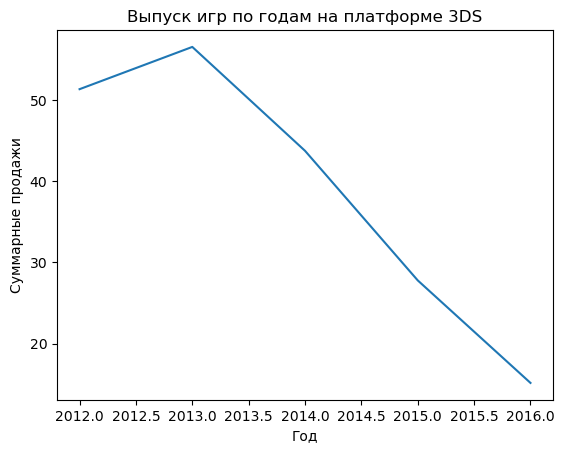

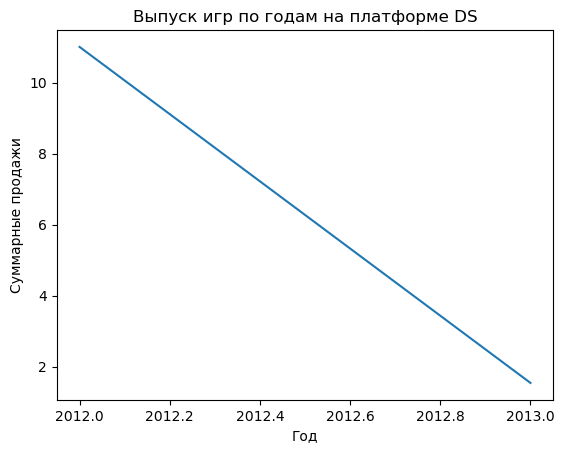

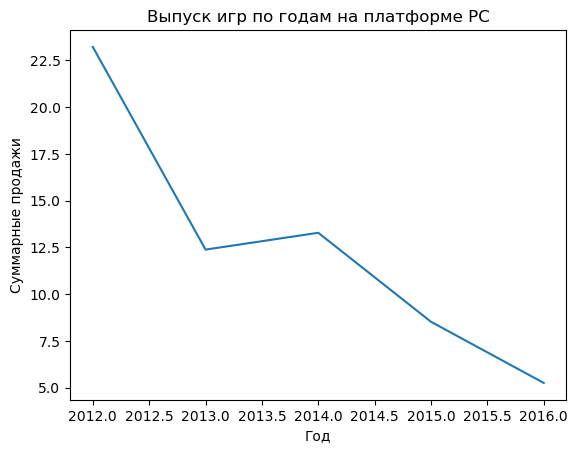

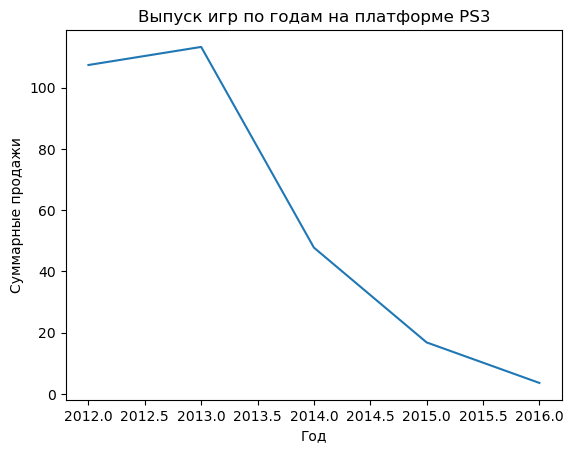

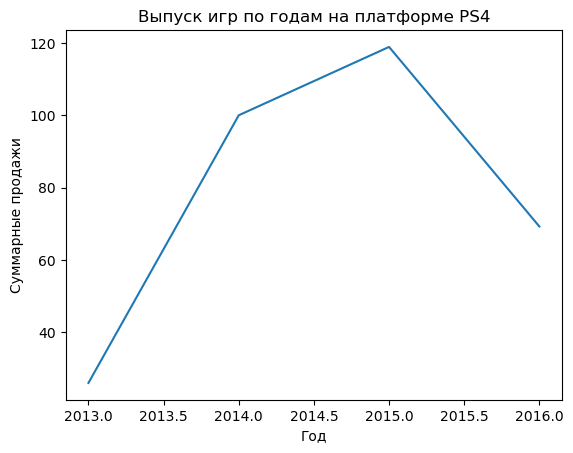

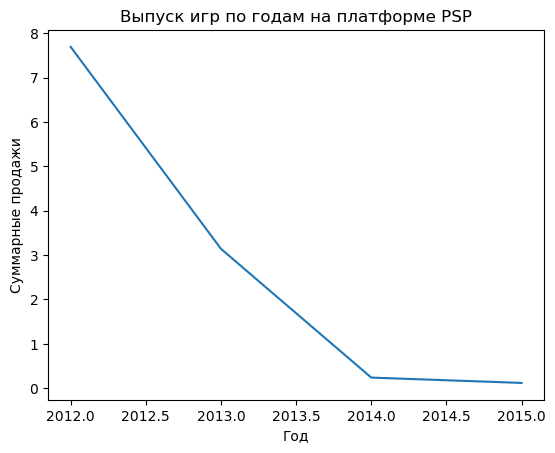

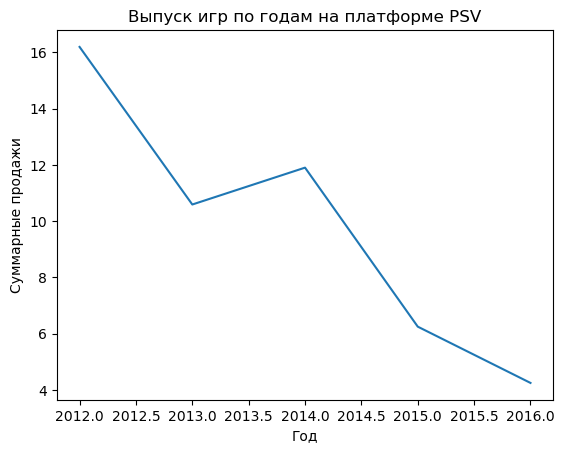

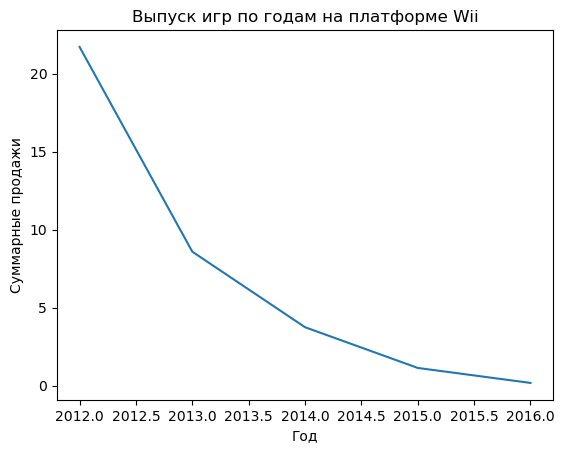

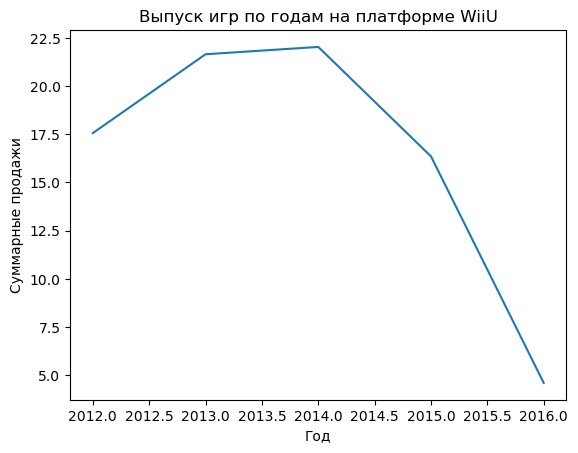

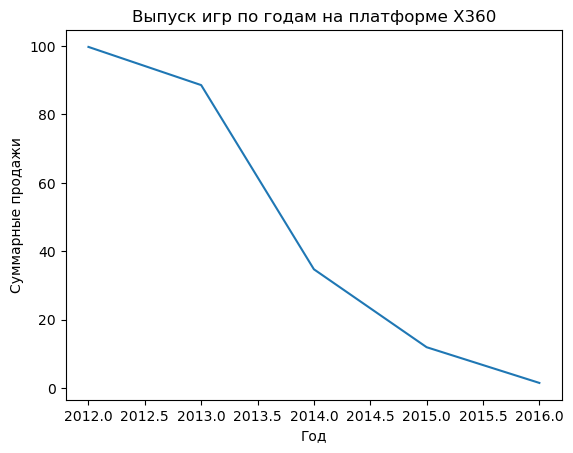

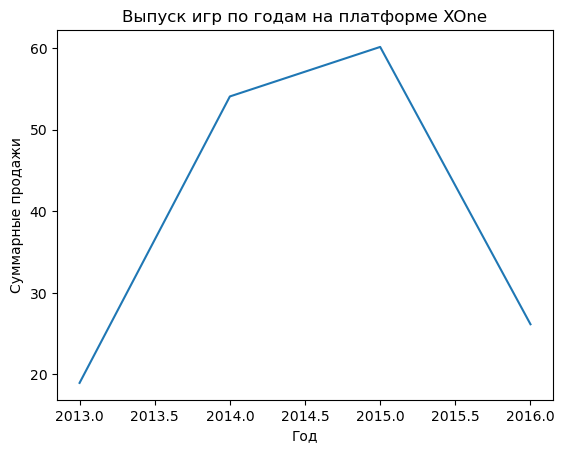

In [43]:
for i in new_platf['platform'].to_list():
    plt.plot(new_platf[new_platf['platform']==i]['sum'].columns.to_list(),new_platf[new_platf['platform']==i]['sum'].values.flatten())
    
    plt.xlabel('Год')
    plt.ylabel('Суммарные продажи')
    plt.title(f'Выпуск игр по годам на платформе {i}')
    plt.show()

Среди представленных платформ у всех уже идет спад, при этом PS4 и XOne имеют еще достаточно высокие показатели продаж и 
будут еще актуальны в течение ближайщих нескольких лет, тогда как другие платформы уже практически потеряли актуальность

Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам

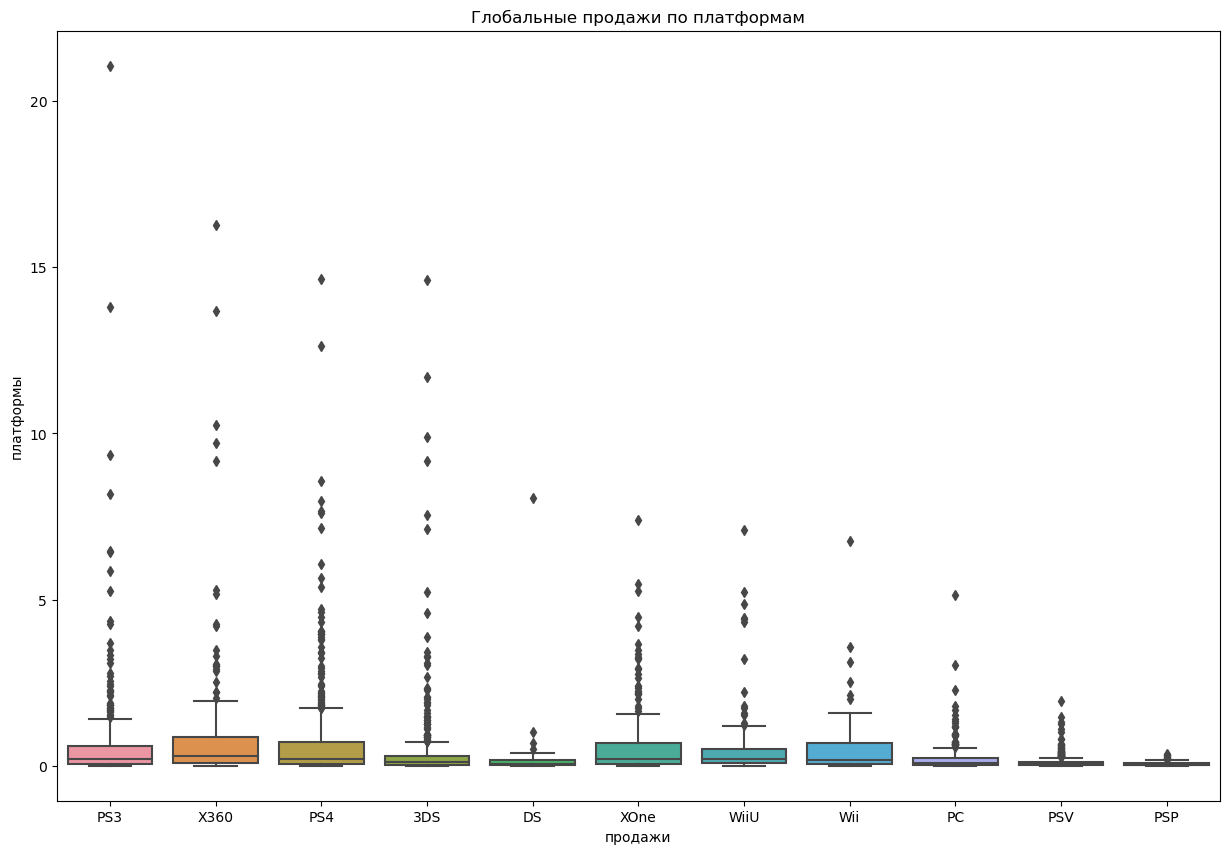

In [44]:
plt.figure(figsize = (15,10))
sns.boxplot(data = data, x = "platform", y= 'total_sales');
plt.title('Глобальные продажи по платформам');
plt.xlabel('продажи');
plt.ylabel('платформы');

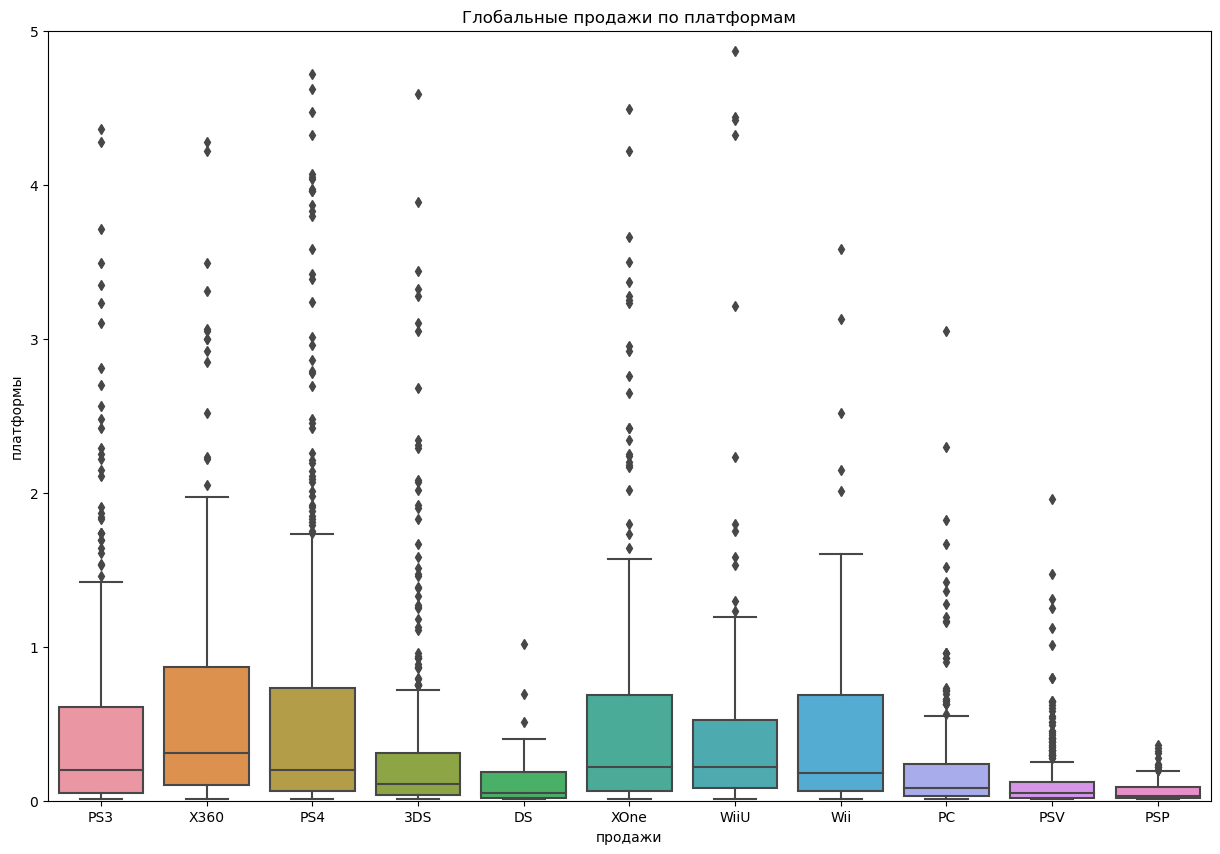

In [45]:
plt.figure(figsize = (15,10))
plt.ylim([0,5])
sns.boxplot(data = data, x = "platform", y= 'total_sales');
plt.title('Глобальные продажи по платформам');
plt.xlabel('продажи');
plt.ylabel('платформы');

Заметим, что в данных присутствует очень много выбросов, в данном случае это говорит  о том, что большинство игр 
не приносят большой прибыли, при этом находится довольно много коммерчески успешных игр. К самым прибыльным площадкам можно отнести 
 X360, PS3,PS4 и XOne. Из которых  PS4 самая актуальная платформа на даный момент

Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
Соотнесите выводы с продажами игр на других платформах.
Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

Выберем одну из самых перспективных платформ на данный момент

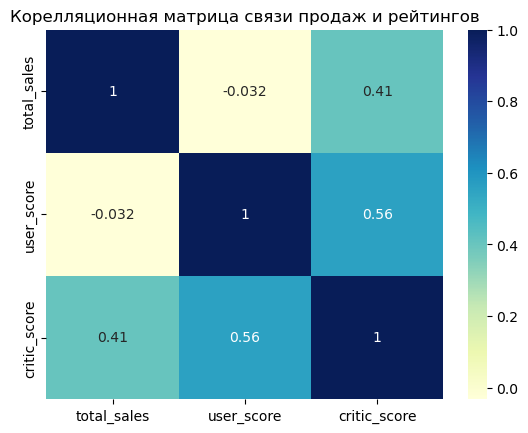

In [46]:
sns.heatmap(data.query('platform=="PS4"')[['total_sales','user_score','critic_score']].corr(), cmap="YlGnBu", annot=True);
plt.title('Корелляционная матрица связи продаж и рейтингов');


Посмотрим для всех платформ

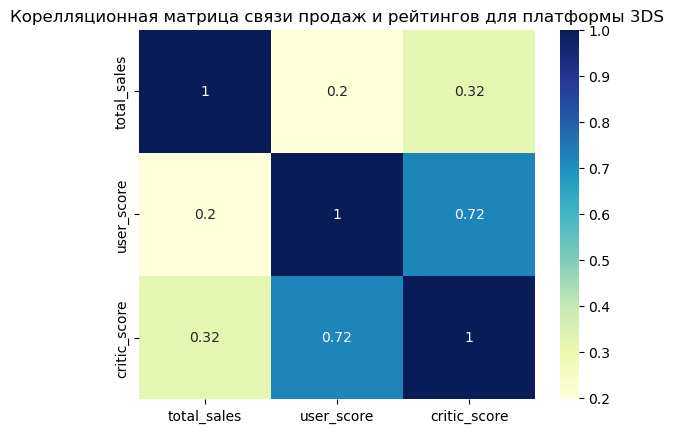

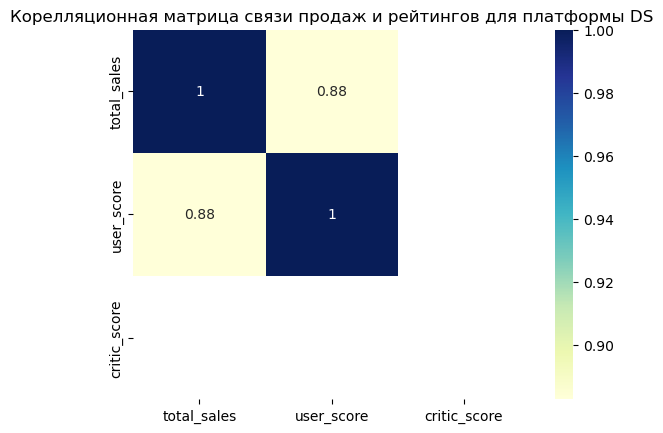

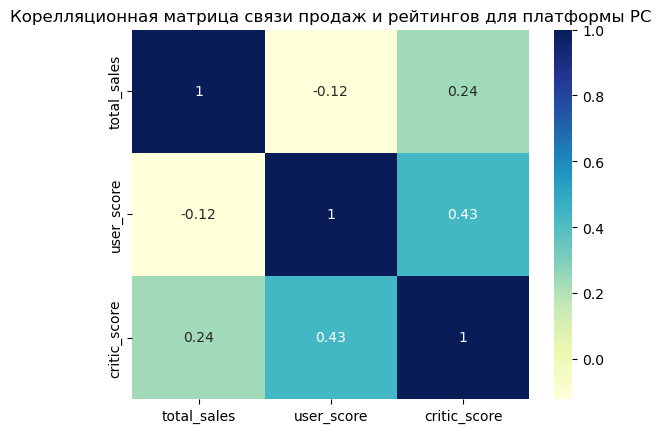

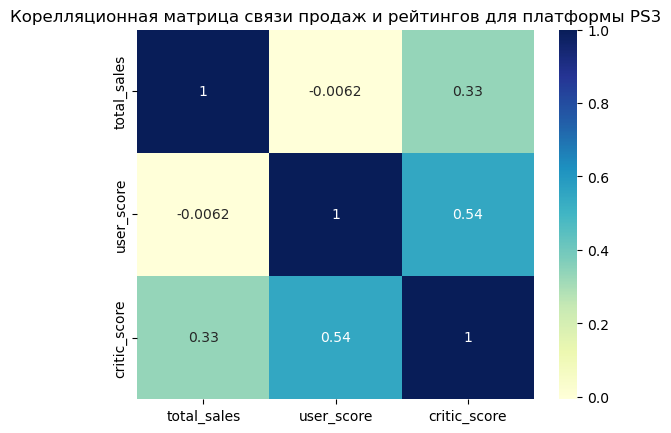

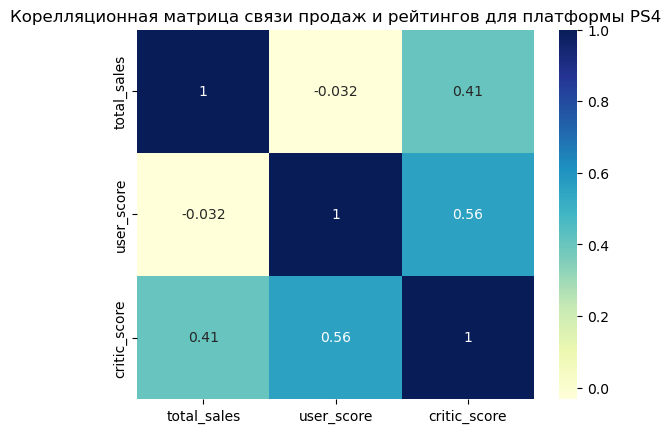

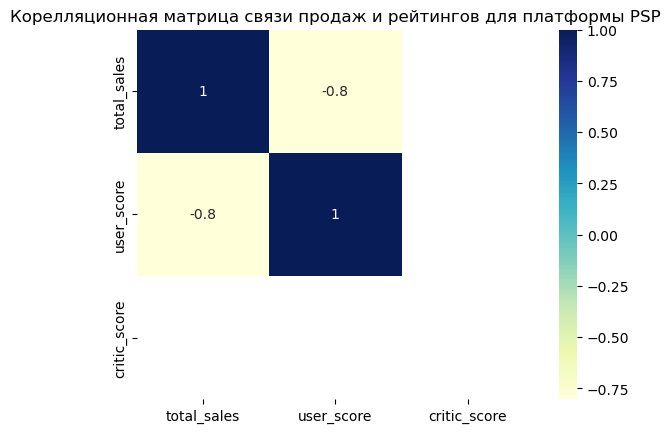

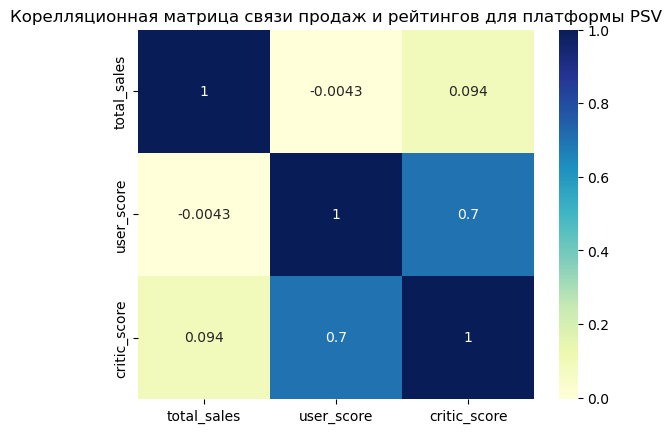

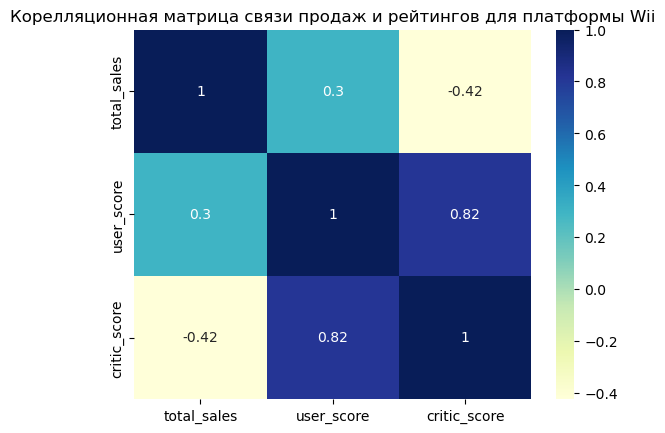

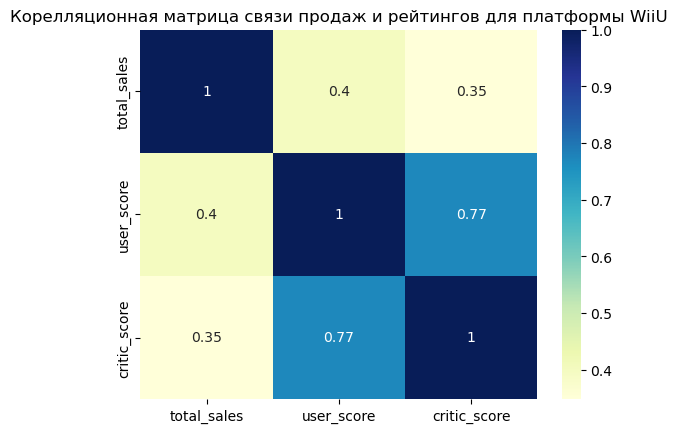

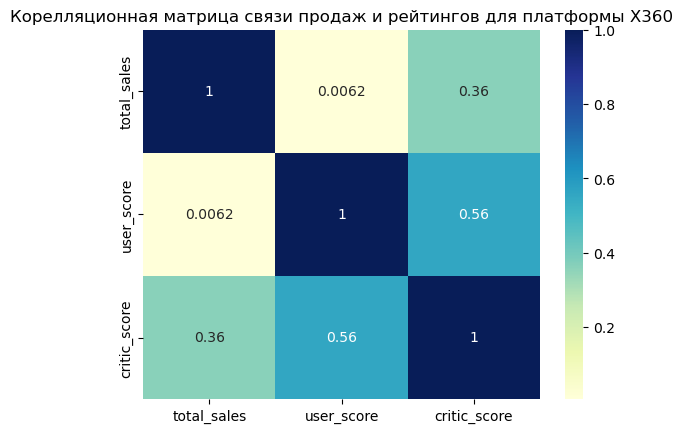

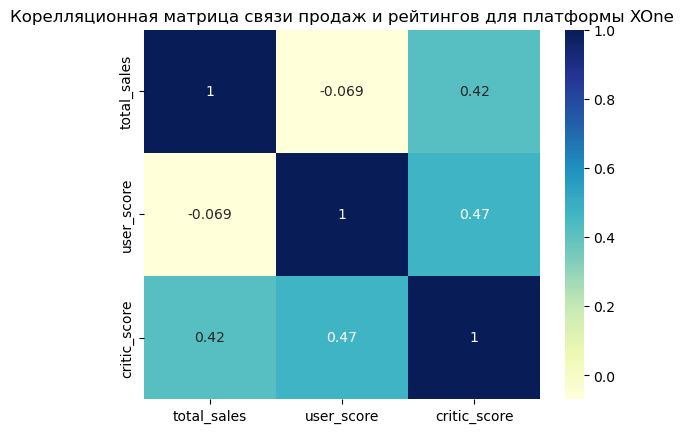

In [47]:

for i in new_platf['platform'].to_list():
    sns.heatmap(data.query('platform==@i')[['total_sales','user_score','critic_score']].corr(), cmap="YlGnBu", annot=True);
    plt.title(f'Корелляционная матрица связи продаж и рейтингов для платформы {i}');
    plt.show()


Продаж имеют слабую корелляционную зависмость с отзывами критиков (за исключением платформ 3DS,Wii,WiiU)                                                                   
                                                                   , при этом с рейтингом пользователей линейной взаимосвязи не
наблюдается 

Теперь построем диаграмму рассеяния для всех платформ

In [48]:
popular_platform=new_platf['platform'].to_list()

Платформа 3DS


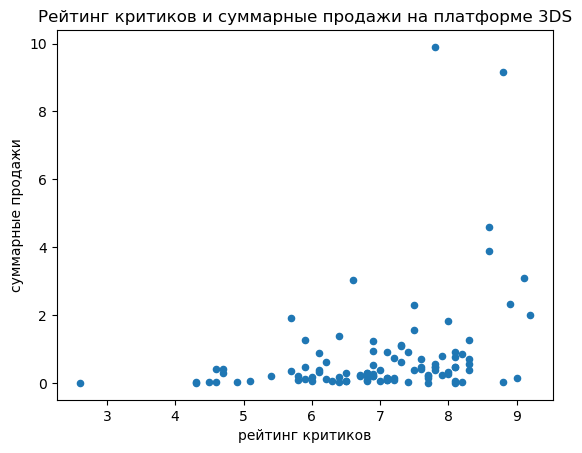

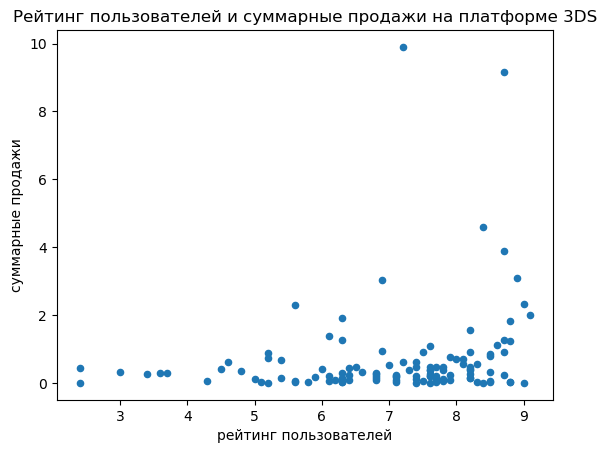

Платформа DS


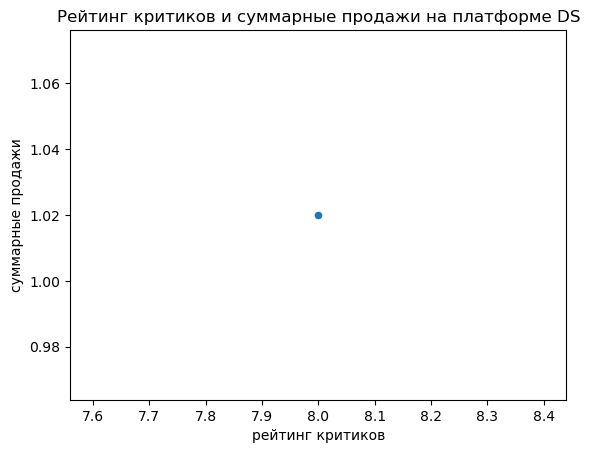

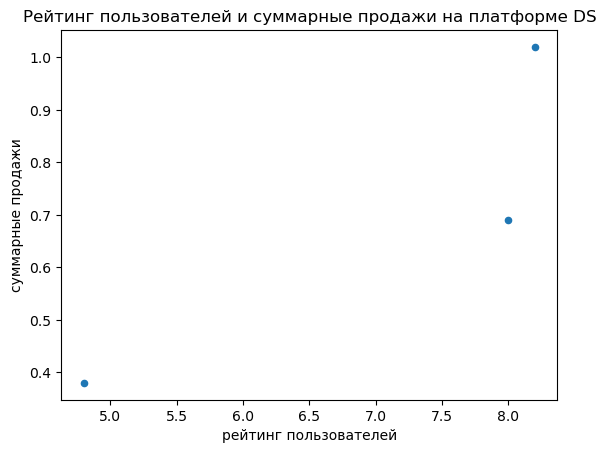

Платформа PC


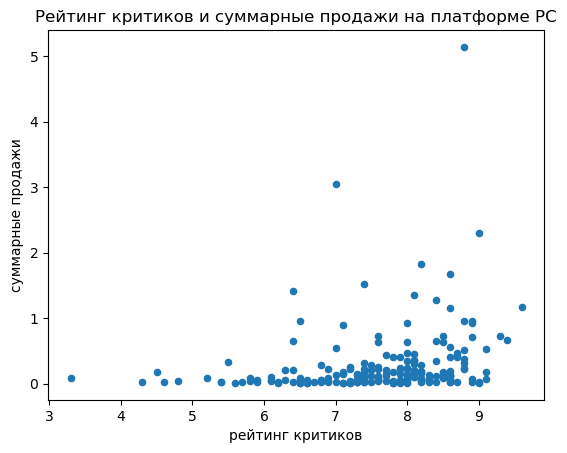

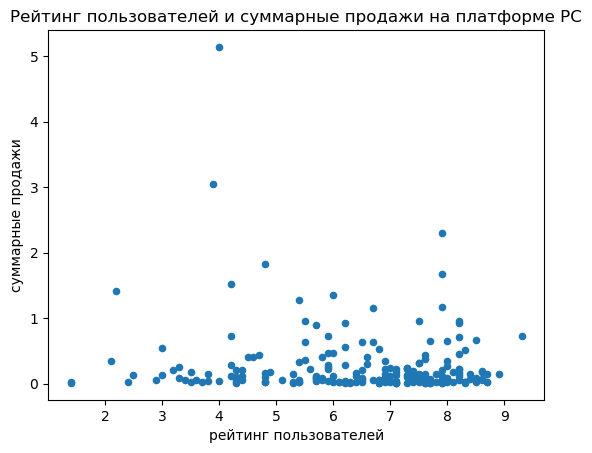

Платформа PS3


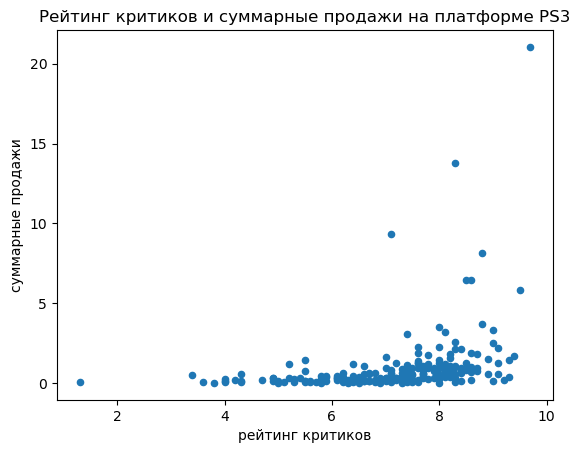

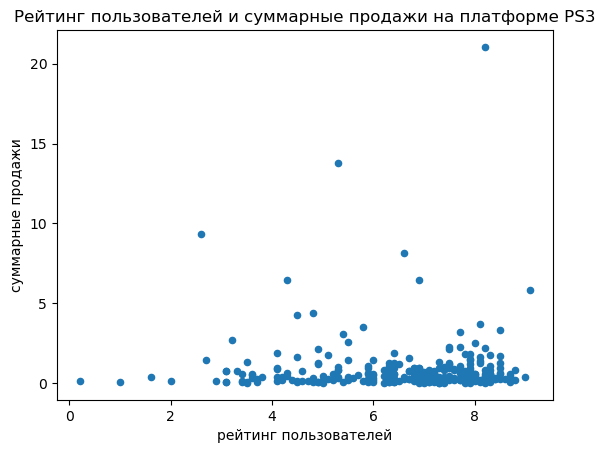

Платформа PS4


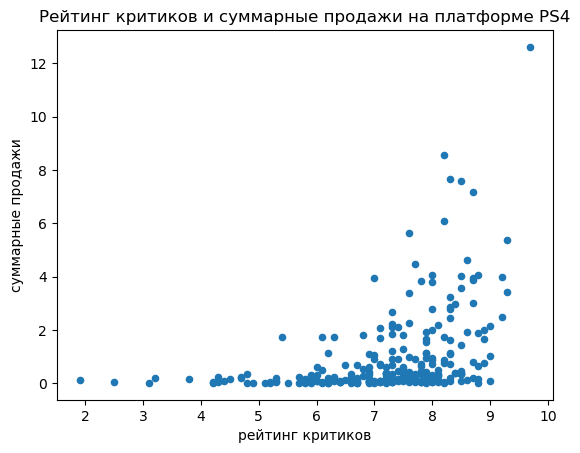

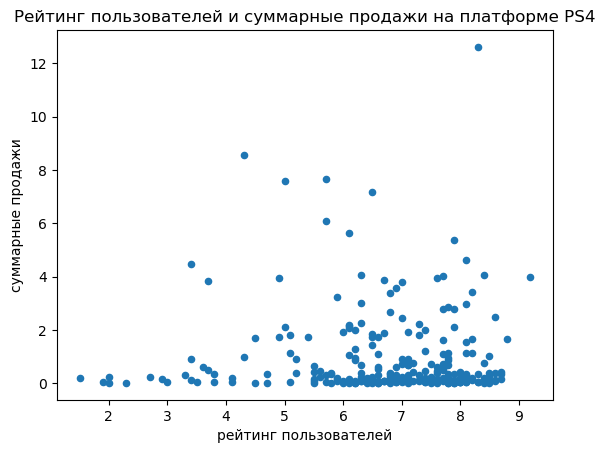

Платформа PSP


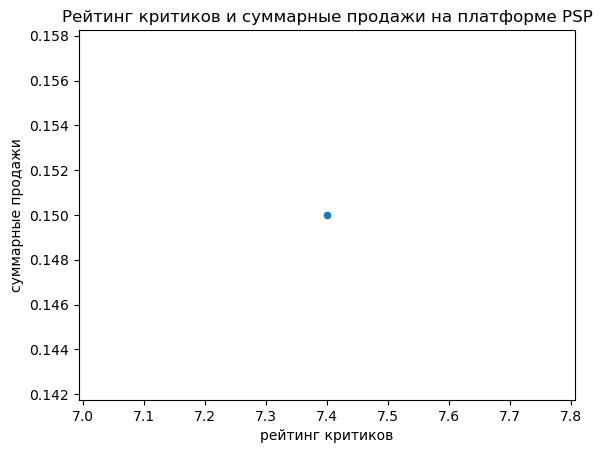

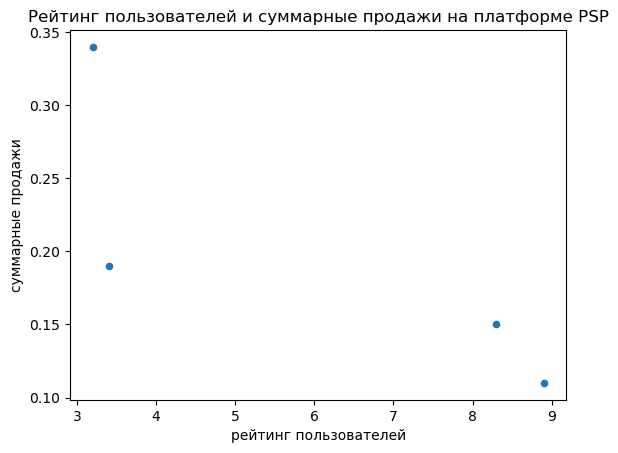

Платформа PSV


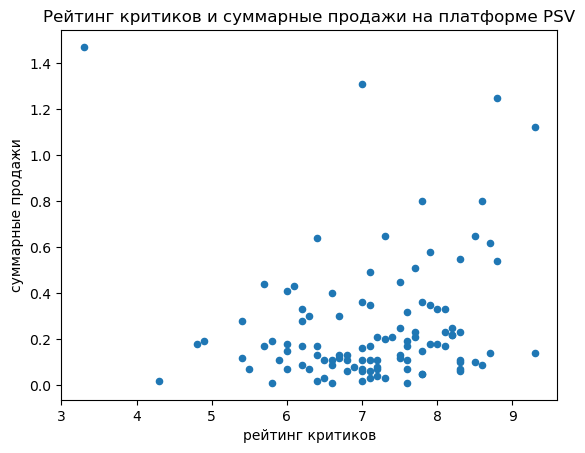

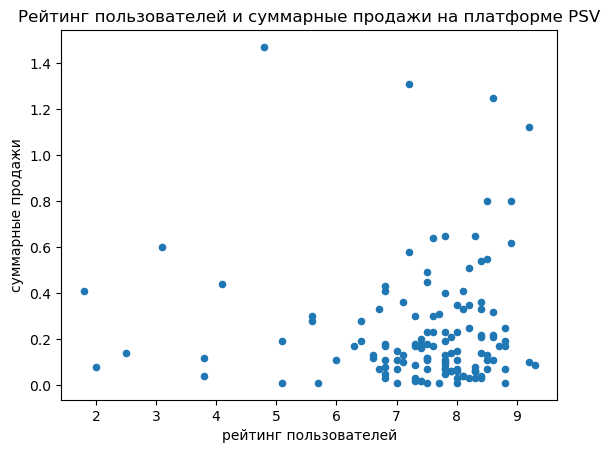

Платформа Wii


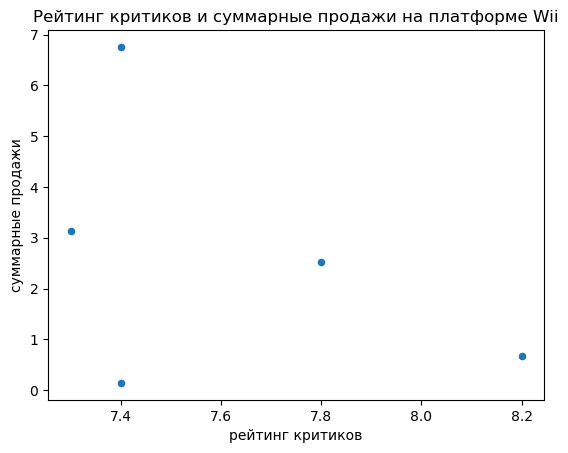

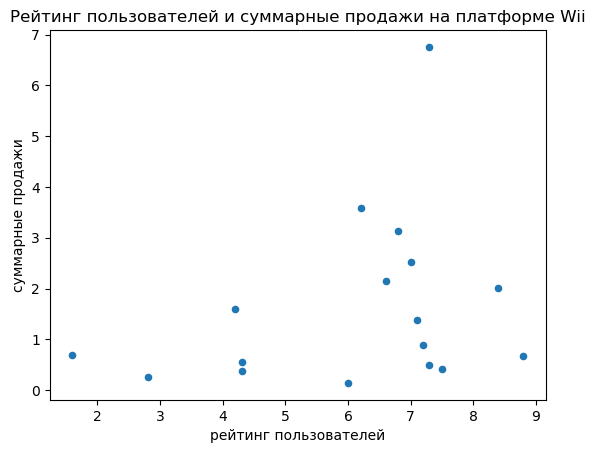

Платформа WiiU


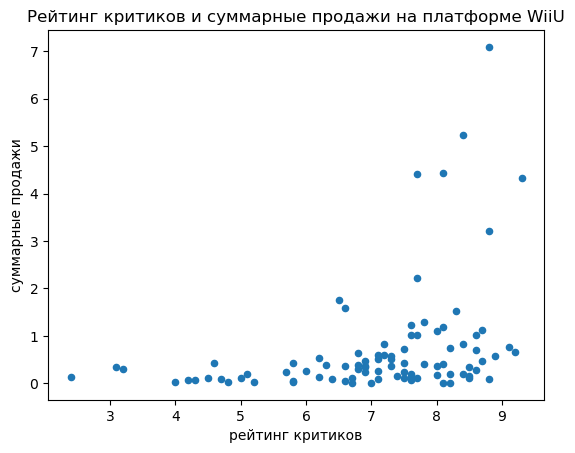

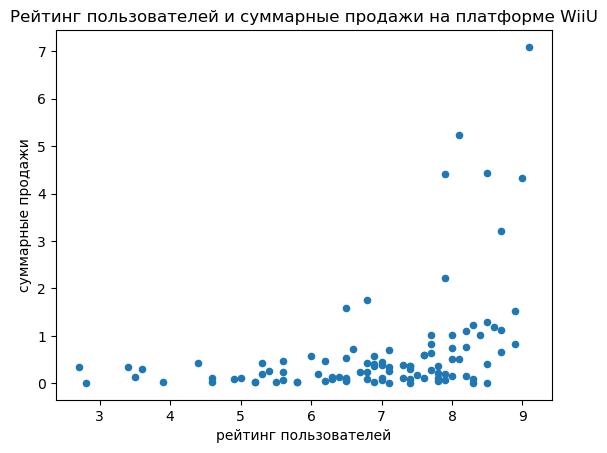

Платформа X360


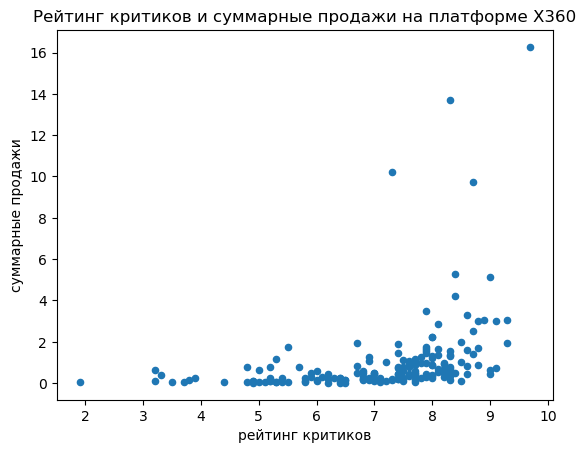

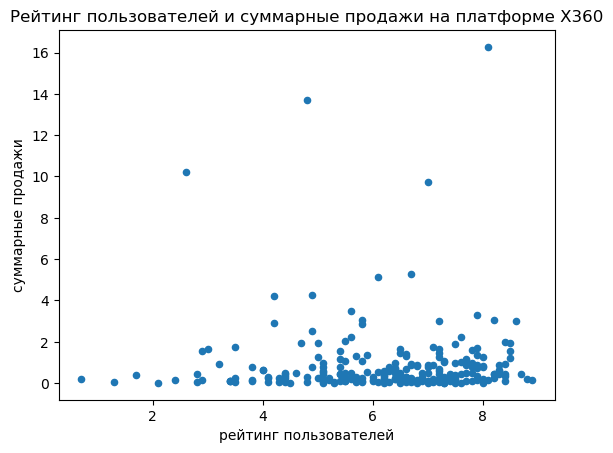

Платформа XOne


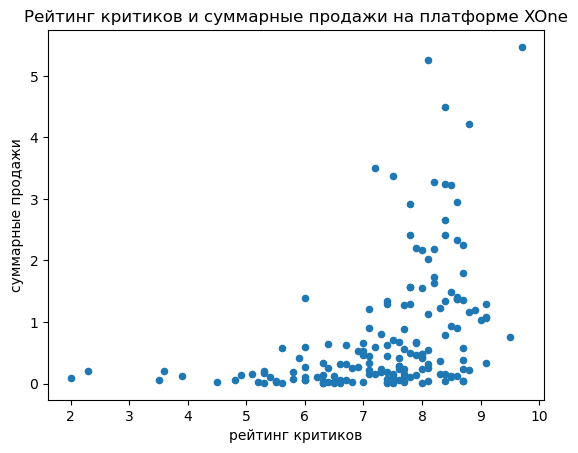

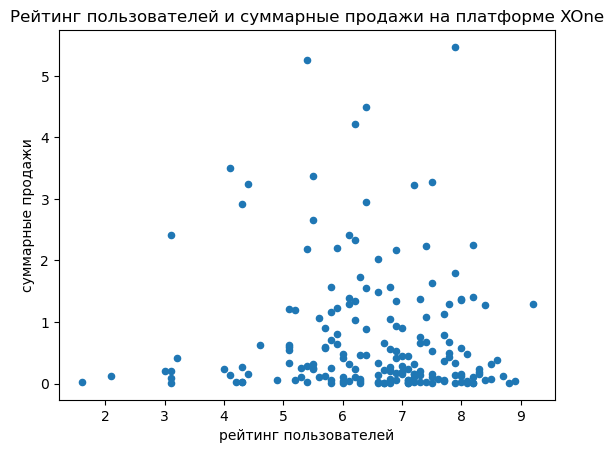

In [49]:
import warnings
warnings.filterwarnings("ignore")
for i in popular_platform:
    data_rating = data[data['platform'] == i]
   # data_rating = data_rating.loc[:,['total_sales', 'critic_score', 'user_score']]
    data_rating['critic_score']=data_rating['critic_score']/10
    print(f'Платформа {i}')
    data_rating.plot(x='critic_score',y='total_sales',kind='scatter');

    plt.title(f'Рейтинг критиков и суммарные продажи на платформе {i}')
    plt.xlabel('рейтинг критиков')
    plt.ylabel('суммарные продажи')
    plt.show()
    data_rating.plot(x='user_score',y='total_sales',kind='scatter');
    plt.title(f'Рейтинг пользователей и суммарные продажи на платформе {i}')

    plt.xlabel('рейтинг пользователей')
    plt.ylabel('суммарные продажи')
    plt.show()

</font><font color='Blue'><b> 
На основе полученных результатов можно сделать выводы, что высокие продажи больше связаны с положительными от 
критиков, чем от пользователей</b></font><br>

Для остальных платформ также нет сильной зависимости между рейтингом пользователей и критиков, и продажами, при этом часто 
присутсвует корелляционная зависимость между оценками пользователей и критиков

Посмотрим на корелляцию в общем случае, без разбивки на платформы

Text(0.5, 1.0, 'Корелляционная матрица связи продаж и рейтингов')

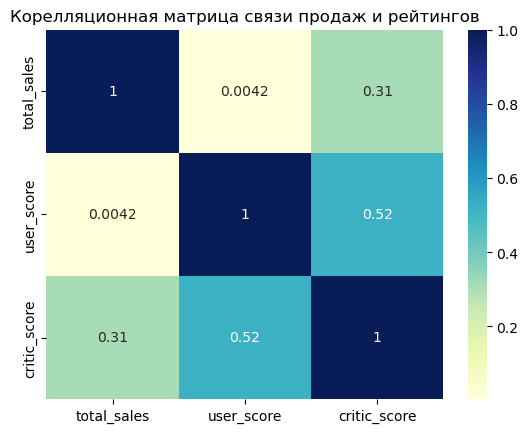

In [51]:
sns.heatmap(data[['total_sales','user_score','critic_score']].corr(), cmap="YlGnBu", annot=True)
plt.title('Корелляционная матрица связи продаж и рейтингов')

 Продажи практически не зависят от пользовательского рейтинга и больше зависят от рейтинга критиков, при этом данную зависимость нельзя назвать сильной

Теперь используем ранговую корелляцию ввиду возможного предположения о нелинейной зависимости

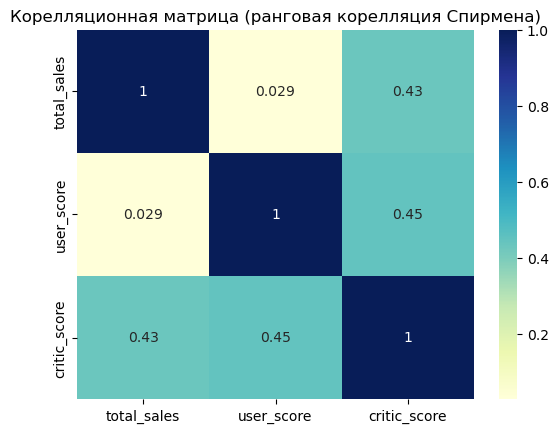

In [52]:
sns.heatmap(data[['total_sales','user_score','critic_score']].corr(method='spearman'), cmap="YlGnBu", annot=True)
plt.title('Корелляционная матрица (ранговая корелляция Спирмена)');

В данном случае получаем такой же вывод: продажи практически не зависят от пользовательского рейтинга и больше зависят от 
    рейтинга критиков, при этом данную зависимость нельзя назвать сильной

Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

Посмотрим на самые популярные жанры по количеству выпускаемых игр

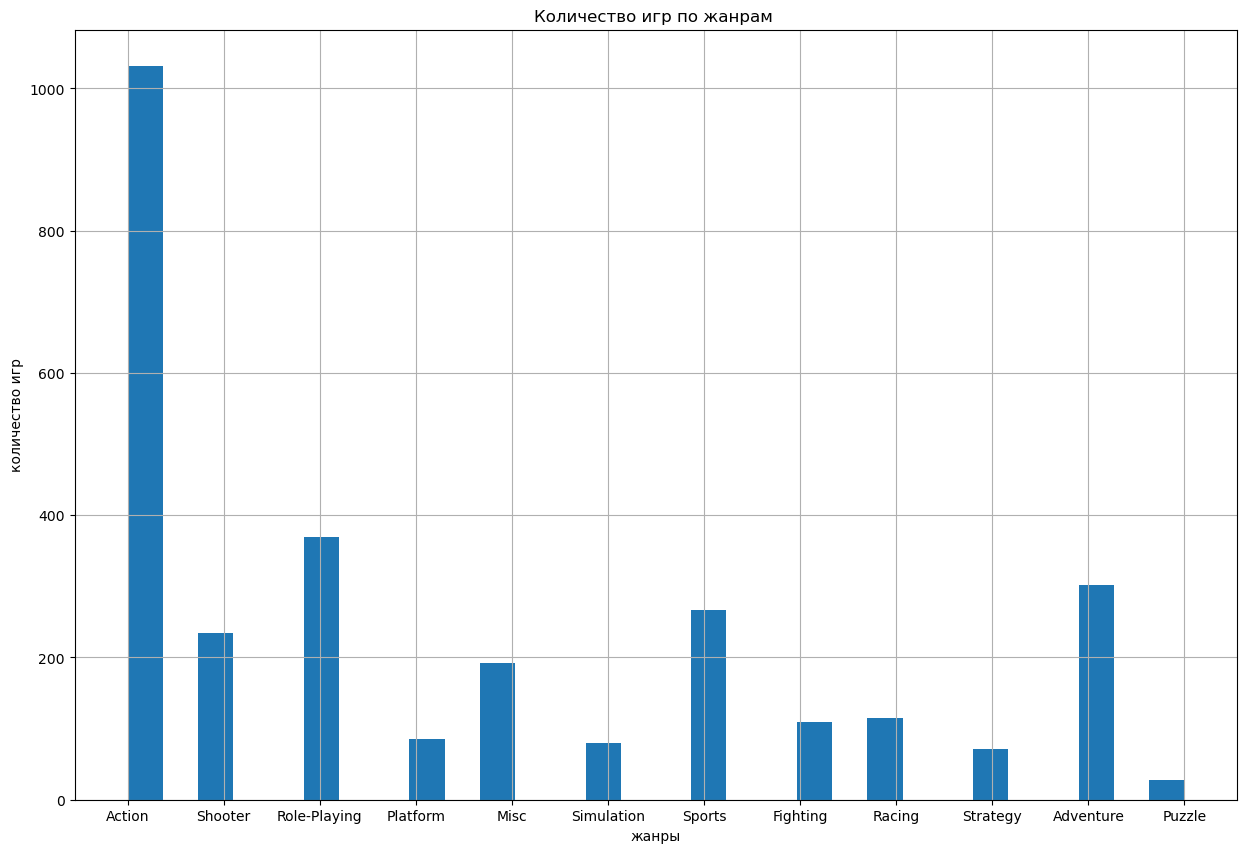

In [53]:

plt.figure(figsize = (15,10))
data['genre'].hist(bins=30);
plt.title('Количество игр по жанрам ');
plt.xlabel('жанры');
plt.ylabel('количество игр');

Посмотрим на самые популярные жанры по общей стоимости продаж

In [54]:

genre_sales=data.pivot_table(index='genre',values='total_sales',aggfunc=['sum']).reset_index()
genre_sales.columns=['genre','total_sales']
genre_sales=genre_sales.sort_values(by='total_sales',ascending=False)

In [55]:
genre_sales

,genre,total_sales
0,Action,441.12
8,Shooter,304.73
7,Role-Playing,192.80
10,Sports,181.06
3,Misc,85.04
4,Platform,61.00
6,Racing,53.50
2,Fighting,44.49
9,Simulation,35.12
1,Adventure,29.43


На первом месте в обоих случаях Action, при этом по суммарной выручке на втором месте находится shooter, который 
не входит даже в топ-5 по количеству выпущенных игр. Это говорит о том, что в среднем игры жанра shooter имеют наибольший 
коммерческий успех

In [56]:
genre_sales_m=data.pivot_table(index='genre',values='total_sales',aggfunc=['median']).reset_index()
genre_sales_m.columns=['genre','total_sales']
genre_sales_m=genre_sales_m.sort_values(by='total_sales',ascending=False)
genre_sales_m

,genre,total_sales
8,Shooter,0.440
10,Sports,0.240
4,Platform,0.210
7,Role-Playing,0.140
6,Racing,0.140
2,Fighting,0.130
0,Action,0.120
3,Misc,0.120
9,Simulation,0.120
11,Strategy,0.080


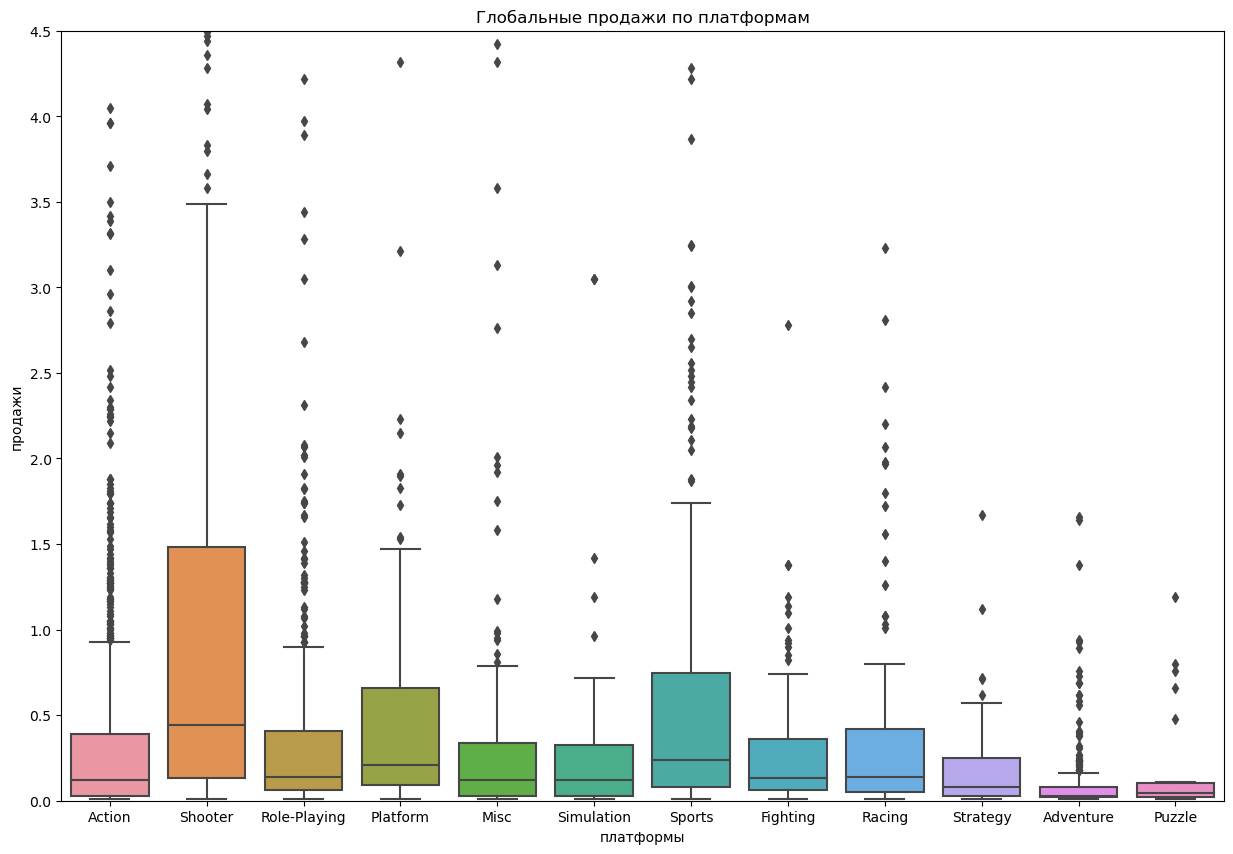

In [57]:
plt.figure(figsize = (15,10))
plt.ylim([0,4.5])
sns.boxplot(data = data, x = "genre", y= 'total_sales');
plt.title('Глобальные продажи по платформам');
plt.ylabel('продажи');
plt.xlabel('платформы');

</font><font color='Blue'><b> 
После расчета медианных значений можно сделать вывод, что самые стабильные жанры это 'shooter' и 'sports', 
большинство игр хорошо продаются. У жанра action довольно низкое медианное значение продаж, при этом наибольшее 
суммарное, в данном случае это говорит о большом количестве выпускаемых игр и о присутствии довольно большого 
количества успешных игр, которых при этом меньше чем у 'shooter' и 'sports' относительного общего числа игр 
в конкретном жанре</b></font><br>

**Шаг 4. Составьте портрет пользователя каждого региона**

Определите для пользователя каждого региона (NA, EU, JP):
    
Самые популярные платформы (топ-5). Опишите различия в долях продаж.

Самые популярные жанры (топ-5). Поясните разницу.

Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [58]:
data['rating'].value_counts()

rating
not_assigned    1275
M                498
T                412
E                394
E10+             306
Name: count, dtype: int64

Определим самые популярные платформы по регионам

In [59]:
data_na=data.pivot_table(index='platform',values='na_sales',aggfunc=['sum']).reset_index()
data_na.columns=['platform','total_na']

platlist=data_na.sort_values(by=['total_na'],ascending=False).head(5)['platform'].to_list()

data_na.loc[~data_na['platform'].isin(platlist),'platform']='other'

In [60]:
data_na=data_na.groupby(['platform']).sum().reset_index()
data_na

,platform,total_na
0,3DS,55.31
1,PS3,103.38
2,PS4,108.74
3,X360,140.05
4,XOne,93.12
5,other,90.37


In [61]:
def top_platforms(data,region:str,title:str):
    data_na=data.pivot_table(index='platform',values=region,aggfunc=['sum']).reset_index()
    data_na.columns=['platform','total_na']
    #data_na=data_na.sort_values(by=['total_na'],ascending=False).head(5)
    platlist=data_na.sort_values(by=['total_na'],ascending=False).head(5)['platform'].to_list()
    data_na.loc[~data_na['platform'].isin(platlist),'platform']='other_platform'
    data_na=data_na.groupby(['platform']).sum().reset_index()
    plt.pie(data_na['total_na'],autopct="%.2f%%",labels=data_na['platform'])

    plt.title(f'Популярные платформы в {title}')
    

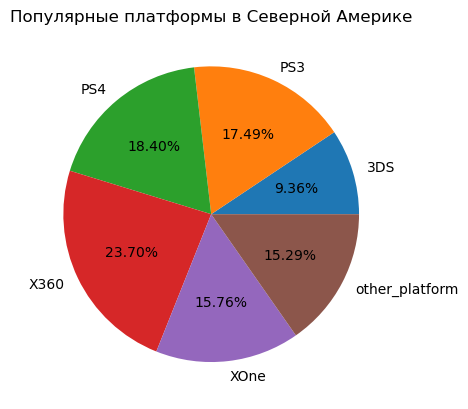

In [62]:
top_platforms(data,'na_sales','Северной Америке')

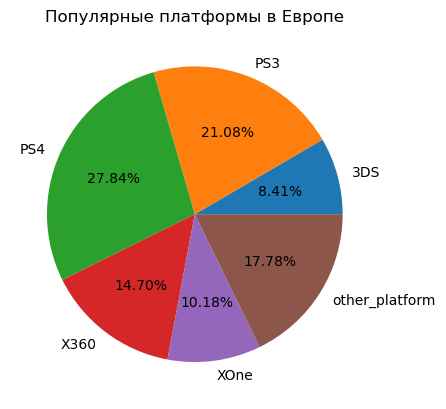

In [63]:
top_platforms(data,'eu_sales','Европе')

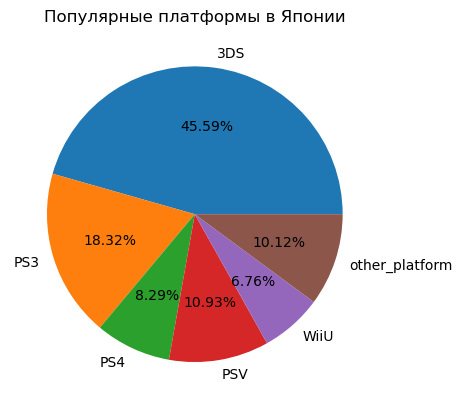

In [64]:
top_platforms(data,'jp_sales','Японии')

Самые популярные платформы в Европе и Северной Америке похожи. При этом в Северной Америке лидером является X360, тогда как
 в Европе PS4. Выбор японцев при этом сильнее отличается от выбора европейцев и американцев. В Японии 
    самой популярной платформой является 3DS, а также в топ входят PS3,PSV, которые тоже не так популярны на американском и 
    европейском рынке

Самые популярные жанры

In [65]:
def top_genres(data,region:str,title:str):
    data_na=data.pivot_table(index='genre',values=region,aggfunc=['sum']).reset_index()
    data_na.columns=['genre','total_na']
    #data_na=data_na.sort_values(by=['total_na'],ascending=False).head(5)
    platlist=data_na.sort_values(by=['total_na'],ascending=False).head(5)['genre'].to_list()
    data_na.loc[~data_na['genre'].isin(platlist),'genre']='other_genre'
    data_na=data_na.groupby(['genre']).sum().reset_index()
    plt.pie(data_na['total_na'],autopct="%.2f%%",labels=data_na['genre'])

    plt.title(f'Популярные жанры в {title} по продажам')

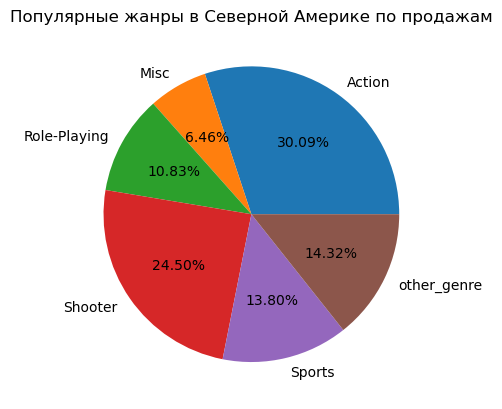

In [66]:
top_genres(data,'na_sales','Северной Америке')

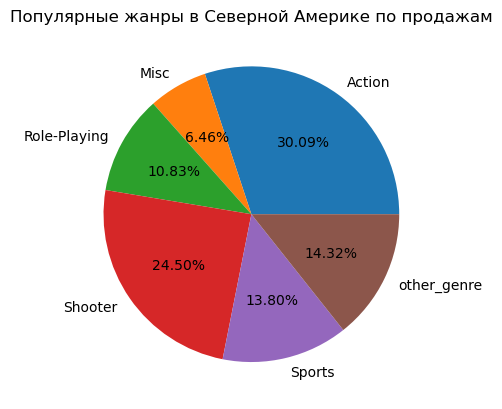

In [68]:
top_genres(data,'na_sales','Северной Америке')

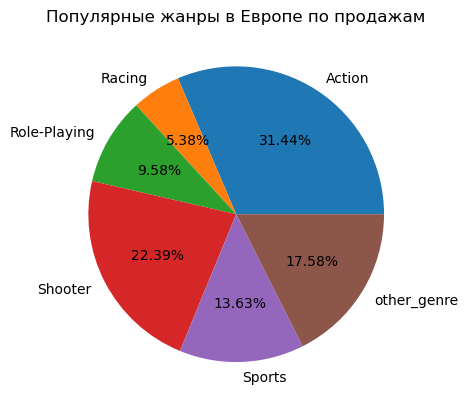

In [69]:
top_genres(data,'eu_sales','Европе')

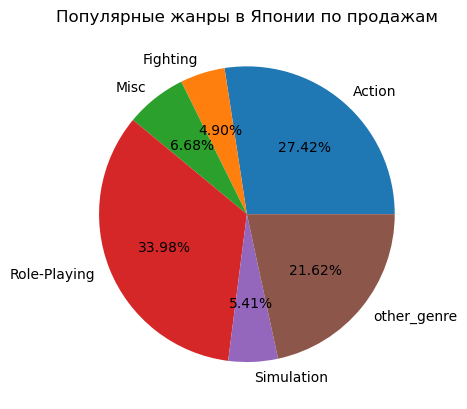

In [70]:
top_genres(data,'jp_sales','Японии')

В данном случае жанровые предпочтения американцев и европейцев полностью совпадают (самые популярные жанры: acion, shooter). 
Тогда как японский рынок сильно отличается и самым популярным жанром является Role-Playing

Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [71]:
data['rating'].value_counts()

rating
not_assigned    1275
M                498
T                412
E                394
E10+             306
Name: count, dtype: int64

In [72]:
def top_rat(data,region:str,title:str):
    data_na=data.pivot_table(index='rating',values=region,aggfunc=['sum']).reset_index()
    data_na.columns=['rating','total']
    platlist=data_na.sort_values(by=['total'],ascending=False).head(5)['rating'].to_list()
    data_na.loc[~data_na['rating'].isin(platlist),'rating']='other_rating'
    data_na=data_na.groupby(['rating']).sum().reset_index()
    #data_na=data_na.sort_values(by=['total'],ascending=False).head(5)
    plt.pie(data_na['total'],autopct="%.2f%%",labels=data_na['rating'])

    plt.title(f'Возрастной рейтинг в {title}')

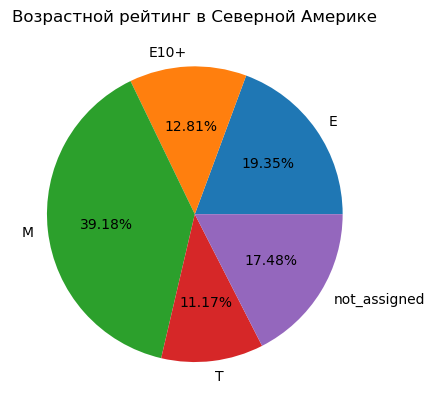

In [73]:
top_rat(data,'na_sales','Северной Америке')

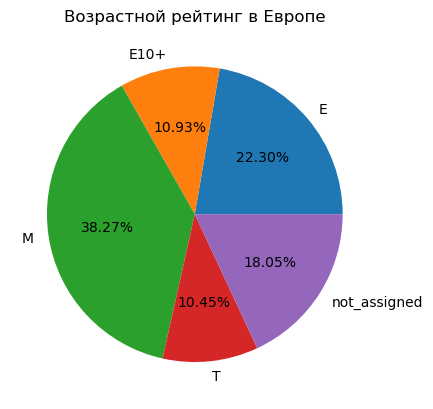

In [74]:
top_rat(data,'eu_sales','Европе')

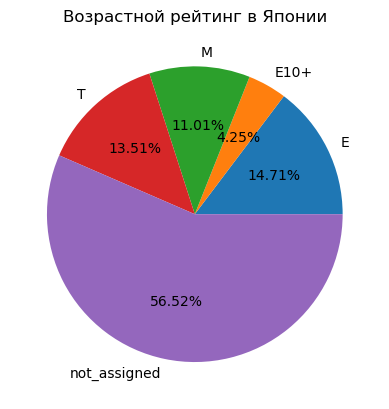

In [75]:
top_rat(data,'jp_sales','Японии')

В данном случае ситуация аналогична. Американский и европейский рынок в данном аспекте практически совпадают, тогда как 
японский заметно отличается большинство игр не являются произведенными в Северной Америке и 
не имеют возрастного рейтинга рейтинга ESRB, на втором месте рейтинг E - то есть для всех возрастов

Таким образом, американский и европейский рынок похожи друг на друга, тогда как японский почти полностью отличается от них.
 Сделаем вывод, что для Японского рынка желательно проводить отдельное исследование, а в общем исследовании иметь это ввиду

In [76]:
# Комментарий ревьюера
temp = data.copy()
print(temp.rating.isna().sum(), temp.rating.isna().sum()/len(temp))
temp.rating.value_counts(dropna=False)

0 0.0


rating
not_assigned    1275
M                498
T                412
E                394
E10+             306
Name: count, dtype: int64

**Шаг 5. Проверьте гипотезы**

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

In [77]:
data_xbox=data.loc[data['platform']=='XOne']['user_score']

In [78]:
data_pc=data.loc[data['platform']=='PC']['user_score']

In [79]:
data_xbox=data_xbox[data_xbox>=0]
data_pc=data_pc[data_pc>=0]

In [80]:
len(data_xbox)

182

In [81]:
len(data_pc)

206

Text(0, 0.5, 'Рейтинг')

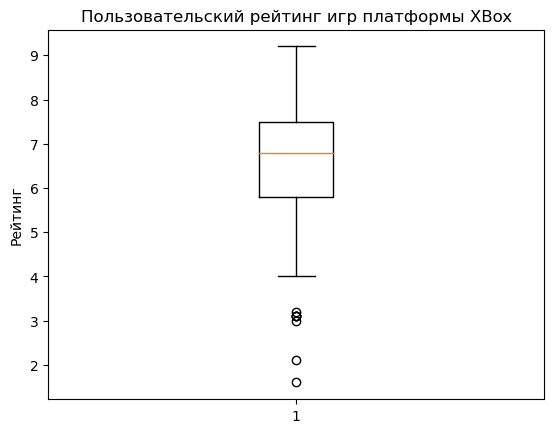

In [82]:
plt.boxplot(data_xbox);
plt.title('Пользовательский рейтинг игр платформы XBox')
plt.ylabel('Рейтинг')

Text(0, 0.5, 'Рейтинг')

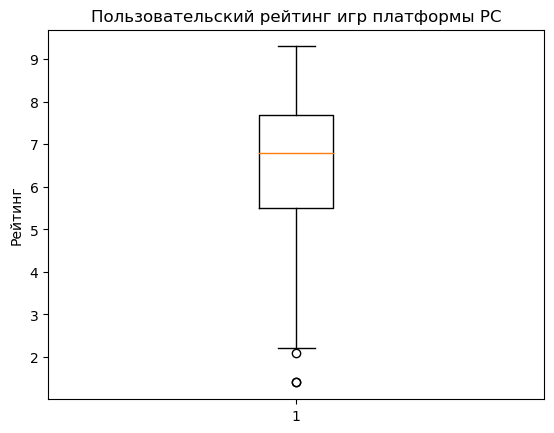

In [83]:
plt.boxplot(data_pc);
plt.title('Пользовательский рейтинг игр платформы PC')
plt.ylabel('Рейтинг')

Для классического t-test необходимо равенство дисперсий. Проверим соответствующую гипотезу

In [84]:
data_xbox.var()

1.9069968429360702

In [85]:
data_pc.var()

2.7704439971584156

$\alpha=0.05$

$H_{0}: \sigma_{1}^{2}=\sigma_{2}^{2}$
    
$H_{1}: \sigma_{1}^{2}\neq\sigma_{2}^{2}$

In [86]:
#гипотеза о равенствте дисперсий
from scipy import stats 
res,pval = stats.levene(data_xbox,data_pc)


In [87]:
print(f'p_value={pval}')

p_value=0.01251484281850554


</font><font color='Blue'><b>Для проверки гипотез будем использовать двусторонний t-тест (с поправкой equal_var=False), так как 
у нас достаточный размер выборки для применимости ЦПТ и довольно мало выбросов в данных</b></font><br>

Отклоняем нулевую гипотезу, дисперсии не равны. В тест передаем параметр equal_var=False

Проверим гипотезу о средних пользовательских рейтингах платформ Xbox One и PC.

$H_{0}: \mu_{1}=\mu_{2}$ (средние пользовательские рейтинги платформ Xbox One и PC равны в г.c.)
    
$H_{1}: \mu_{1}\neq\mu_{2}$ (средние пользовательские рейтинги платформ Xbox One и PC не равны в г.c.)
    
    

In [88]:
alpha = 0.05 
results = stats.ttest_ind(
data_xbox,
data_pc,equal_var=False)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5489537965134912
Не получилось отвергнуть нулевую гипотезу


In [89]:
print(f'средний рейтинг платформы XOne {data_xbox.mean()}')
print(f'средний рейтинг платформы PC {data_pc.mean()}')

средний рейтинг платформы XOne 6.521428571428572
средний рейтинг платформы PC 6.4286407766990274


Таким образом, у нас нет статистических оснований отвергнуть нулевую гипотезу о различие средних пользовательских 
рейтингов платформ Xbox One и PC

Проверим гипотезу о том, что средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

In [90]:
data_action=data.loc[data['genre']=='Action']['user_score']
data_sports=data.loc[data['genre']=='Sports']['user_score']

In [91]:
data_action=data_action[data_action>=0]
data_sports=data_sports[data_sports>=0]

In [92]:
data_sports.var()

3.0385428128839274

In [93]:
data_action.var()

1.8890840494348116

Аналогично проверим гипотезу о равенстве дисперсий

$\alpha=0.05$

$H_{0}: \sigma_{1}^{2}=\sigma_{2}^{2}$
    
$H_{1}: \sigma_{1}^{2}\neq\sigma_{2}^{2}$

In [94]:
res,pval = stats.levene(data_sports,data_action)

In [95]:
print(f'p_value={pval}')

p_value=1.045718795108326e-05


Отклоняем нулевую гипотезу, дисперсии не равны. В тест передаем параметр equal_var=False

In [96]:
len(data_action)

523

In [97]:
len(data_sports)

194

Text(0, 0.5, 'Рейтинг')

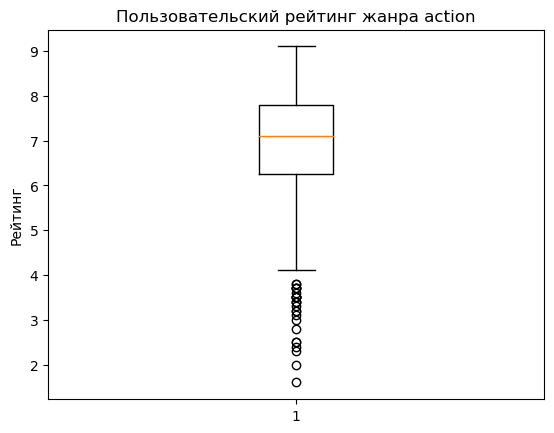

In [98]:
plt.boxplot(data_action);
plt.title('Пользовательский рейтинг жанра action')
plt.ylabel('Рейтинг')

Text(0, 0.5, 'Рейтинг')

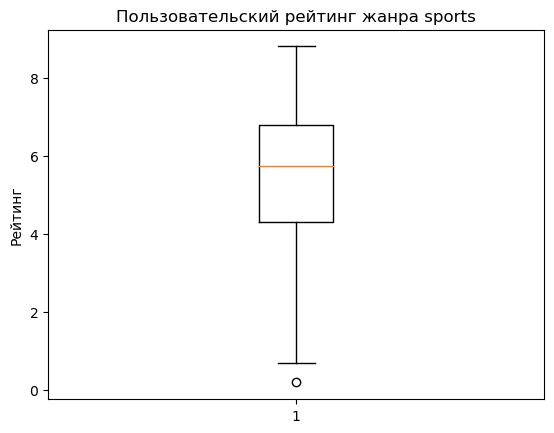

In [99]:
plt.boxplot(data_sports);
plt.title('Пользовательский рейтинг жанра sports')
plt.ylabel('Рейтинг')

Проверим гипотезу о средних пользовательских рейтингах жанров Action и Sports .

$H_{0}: \mu_{1}=\mu_{2}$ (средние пользовательские рейтинги жанров Action и Sports равны в г.с.)
    
$H_{1}: \mu_{1}\neq\mu_{2}$ (средние пользовательские рейтинги жанров Action и Sports не равны в г.c.)

In [100]:
alpha = 0.05 
results = stats.ttest_ind(
data_sports,
data_action,equal_var=False)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 5.989458066467418e-20
Отвергаем нулевую гипотезу


In [101]:
print(f'средний рейтинг жанра sports: {data_sports.mean()}')
print(f'средний рейтинг жанра action: {data_action.mean()}')

средний рейтинг жанра sports: 5.455670103092784
средний рейтинг жанра action: 6.825047801147227


Таким образом, имеем статистические основания отвергнуть нулевую гипотезу в пользу альтернативной: 
    средние пользовательские рейтинги жанров Action и Sports разные. Скорее всего средние рейтинги различны 
    в генеральной совокупности

**Выводы:**
    
    

1) В рамках предобработки была исследована целостность датасета, удалены неявные дубликаты, данные приведены к соответствующим им типам

1) Для анализа нет необходимости учитывать все время. Достаточно начать исследование с 2012 года.

2) Самыми перспективными на данный момент платформами являются PS4 и XOne, но стоит учитывать, что продажи уже идут на спад

3) К самым прибыльным площадкам за последнее время можно отнести X360, PS3,PS4 и XOne. Но стоит иметь ввиду, что большинство 
игр не приносит много денег, при этом присутствует довольно много 'выбросов', являющихся коммерчески успешными играми.
Самыми коммерчески успешными жанрами являются shooter и sports, имеющие наибольшие медианные значения продаж, при этом 
самым популярным является action, в данном жанре также выходят успешные игры

4) Отметим также, что пользовательский рейтинг не влияет на продажи, в основном смотрят на оценку критиков. Для большинства 
платформ зависимость не очень сильная, за исключением 3DS, Wii, WiiU

5) Для более детального анализа необходимо рассматривать (Европу и Америку) и Японию отдельно. Так как портрет пользователя 
из Японии очень сильно отличается от европейского и амерканского.

6) В рамках проверки статистических гипотез получили следующие выводы:
    
    * нет статистических оснований отвергнуть нулевую гипотезу о различие средних пользовательских рейтингов платформ Xbox One и PC
    
    * имеем статистические основания отвергнуть нулевую гипотезу в пользу альтернативной: средние пользовательские рейтинги жанров Action и Sports разные
        
Таким образом, стоит обратить внимание на платформы PS4 и XOne, и на жанры shooter и sports. Возрастные рейтинги M (17+) и E (
любой возраст) являются самыми популярным. Стоит уделить внимание европейскому и американскому рынку, так как они схожи, 
а японский рынок не такой большо и сильно отличается в всех остальных. Также стоит обращать внимание на отзывы критиков, 
при этом для оценки продаж игры на отзывы пользователей можно не смотреть